### Importing the libraries

In [1]:
### Data Wrangling

import pandas as pd
import numpy as np

### Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt


### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [2]:
# load train data
train_df = pd.read_csv(r"C:\Users\JINCY\Desktop\Study Material\DSA\DSA project\credit score classification\train.csv",low_memory=False)
# Load test data
test_df = pd.read_csv(r"C:\Users\JINCY\Desktop\Study Material\DSA\DSA project\credit score classification\test.csv")

### Dataset description

ID: Represents a unique identification of an entry

Customer_ID: Represents a unique identification of a person

Month: Represents the month of the year

Name: Represents the name of a person

Age: Represents the age of the person

SSN: Represents the social security number of a person

Occupation: Represents the occupation of the person

Annual_Income: Represents the annual income of the person

Monthly_Inhand_Salary: Represents the monthly base salary of a person

Num_Bank_Accounts: Represents the number of bank accounts a person holds

Num_Credit_Card: Represents the number of other credit cards held by a person

Interest_Rate: Represents the interest rate on credit card

Num_of_Loan: Represents the number of loans taken from the bank

Type_of_Loan: Represents the types of loan taken by a person

Delay_from_due_date: Represents the average number of days delayed from the payment date

Num_of_delayed_Payment: Represents the average number of payments delayed by a person

Changed_Credit_Limit: Represents the percentage change in credit card limit

Num_Credit_Inquiries: Represents the number of credit card inquiries

Credit_Mix: Represents the classification of the mix of credits

Outstanding_Debt: Represents the remaining debt to be paid (in USD)

Credit_Utilization_Ratio: Represents the utilization ratio of credit card

Credit_History_Age: Represents the age of credit history of the person

Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person

Total_EMI_per_Month : Represents the monthly EMI amount paid by the person

Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)

Payment_Behaviour: Represents the payment behavior of the customer (in USD)

Monthly_Balance: Represents the monthly balance amount of the customer (in USD)

Credit_Score: Represents the bracket of credit score (Poor, Standard, Good)

In [3]:
test_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [4]:
# Re-size the dataset

train_df = train_df[:8000] 
test_df = test_df[:4000]

In [5]:
train_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0x44d9,CUS_0xb591,April,Prasadc,52_,356-12-8113,Lawyer,35724.37,3149.030833,5,...,_,18.29,34.545915,25 Years and 0 Months,No,86.135097,69.82077261,High_spent_Small_value_payments,418.9472134,Poor
7996,0x44da,CUS_0xb591,May,NaN,52,356-12-8113,Lawyer,35724.37,NaN,5,...,Good,18.29,27.779343,25 Years and 1 Months,No,86.135097,189.7084045,Low_spent_Large_value_payments,309.0595815,Poor
7997,0x44db,CUS_0xb591,June,Prasadc,52,356-12-8113,Lawyer,35724.37,3149.030833,5,...,Good,18.29,39.153719,25 Years and 2 Months,No,86.135097,73.40766144,High_spent_Large_value_payments,395.3603245,Standard
7998,0x44dc,CUS_0xb591,July,Prasadc,52,356-12-8113,_______,35724.37_,3149.030833,5,...,_,18.29,33.486230,NaN,No,86.135097,85.76795001,High_spent_Small_value_payments,403.000036,Poor


In [6]:
test_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0x44d5,CUS_0xb1da,December,Paulj,35,671-03-8487,_______,110721.66,9259.805000,3,...,6.0,Standard,281.42,33.022917,26 Years and 10 Months,No,209.245449,506.0975104288784,Low_spent_Large_value_payments,480.63754106096667
3996,0x44de,CUS_0xb591,September,Prasadc,52,356-12-8113,Lawyer,35724.37,3149.030833,5,...,1.0,Good,18.29,39.974661,25 Years and 5 Months,No,86.135097,77.22919284159995,High_spent_Medium_value_payments,401.53879313260046
3997,0x44df,CUS_0xb591,October,Prasadc,52,356-12-8113,Lawyer,35724.37,NaN,5,...,6.0,Good,18.29,27.360690,25 Years and 6 Months,No,86.135097,57.38424824355239,High_spent_Large_value_payments,411.38373773064814
3998,0x44e0,CUS_0xb591,November,Prasadc,52,#F%$D@*&8,Lawyer,35724.37,3149.030833,5,...,6.0,Good,18.29,41.033769,25 Years and 7 Months,No,86.135097,136.8074109549581,Low_spent_Small_value_payments,381.9605750192424


In [7]:
### Shape of the dataset

print(train_df.shape)
print(test_df.shape)


(8000, 28)
(4000, 27)


The dataset consists of 28 columns and 100000 rows.

In [8]:
### Looking at the datas in the dataset

train_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0x44d9,CUS_0xb591,April,Prasadc,52_,356-12-8113,Lawyer,35724.37,3149.030833,5,...,_,18.29,34.545915,25 Years and 0 Months,No,86.135097,69.82077261,High_spent_Small_value_payments,418.9472134,Poor
7996,0x44da,CUS_0xb591,May,NaN,52,356-12-8113,Lawyer,35724.37,NaN,5,...,Good,18.29,27.779343,25 Years and 1 Months,No,86.135097,189.7084045,Low_spent_Large_value_payments,309.0595815,Poor
7997,0x44db,CUS_0xb591,June,Prasadc,52,356-12-8113,Lawyer,35724.37,3149.030833,5,...,Good,18.29,39.153719,25 Years and 2 Months,No,86.135097,73.40766144,High_spent_Large_value_payments,395.3603245,Standard
7998,0x44dc,CUS_0xb591,July,Prasadc,52,356-12-8113,_______,35724.37_,3149.030833,5,...,_,18.29,33.486230,NaN,No,86.135097,85.76795001,High_spent_Small_value_payments,403.000036,Poor


In [9]:
### Looking at the sample data in the dataset

train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [10]:
# Check for null values

print(train_df.isna().sum())
print("\n\n")
print(test_df.isna().sum())


ID                             0
Customer_ID                    0
Month                          0
Name                         793
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       1177
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                 952
Delay_from_due_date            0
Num_of_Delayed_Payment       560
Changed_Credit_Limit           0
Num_Credit_Inquiries         159
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age           741
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      337
Payment_Behaviour              0
Monthly_Balance              105
Credit_Score                   0
dtype: int64



ID                            0
Customer_ID                 

There are null values in 
- Name 
- Monthly_Inhand_Salary 
- Type_of_Loan 
- Num_of_Delayed_Payment
- Num_Credit_Inquiries
- Credit_History_Age
- Amount_invested_monthly
- Monthly_Balance 

In [11]:
### Looking at the datatypes of the data

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8000 non-null   object 
 1   Customer_ID               8000 non-null   object 
 2   Month                     8000 non-null   object 
 3   Name                      7207 non-null   object 
 4   Age                       8000 non-null   object 
 5   SSN                       8000 non-null   object 
 6   Occupation                8000 non-null   object 
 7   Annual_Income             8000 non-null   object 
 8   Monthly_Inhand_Salary     6823 non-null   float64
 9   Num_Bank_Accounts         8000 non-null   int64  
 10  Num_Credit_Card           8000 non-null   int64  
 11  Interest_Rate             8000 non-null   int64  
 12  Num_of_Loan               8000 non-null   object 
 13  Type_of_Loan              7048 non-null   object 
 14  Delay_fr

From the above data,the columns - Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, Amount_invested_monthly, Monthly_Balance are object data type so we will change the datatype of these columns from object to a numerical datatype like int or float.

In [12]:
### Summary statistics of the numerical columns in the dataset

train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,6823.000000,8000.000000,8000.000000,8000.000000,8000.000000,7841.000000,8000.000000,8000.000000
mean,4299.166681,17.031125,24.076750,73.933875,21.642625,23.061599,32.312193,1374.858962
std,3202.084855,119.001557,138.319615,466.972928,14.749478,166.795965,5.169516,8159.149111
min,355.208333,0.000000,0.000000,1.000000,-5.000000,0.000000,20.172942,0.000000
25%,1698.773333,3.000000,4.000000,7.000000,11.000000,3.000000,27.980463,29.485471
50%,3211.081667,6.000000,5.000000,14.000000,19.000000,5.000000,32.330276,69.717948
75%,5978.466667,8.000000,7.000000,20.000000,29.000000,9.000000,36.593778,167.081471
max,14828.983330,1777.000000,1486.000000,5721.000000,67.000000,2592.000000,48.247003,82204.000000


### 1 . Removing symbols/characters present in rows

In [13]:
# Identify numerical columns with symbols present in rows

train_df.select_dtypes(include='object').columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Columns that should be of numeric datatype:
- Age
- Annual_Income
- Num_of_Loan
- Num_of_Delayed_Payment
- Changed_Credit_Limit
- Outstanding_Debt
- Amount_invested_monthly
- Monthly_Balance

In [14]:
# select those 8 columns

convert_cols = ['Age',
       'Annual_Income', 'Num_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Outstanding_Debt', 
       'Amount_invested_monthly','Monthly_Balance']

In [15]:
# check unique values in all columns

for col in train_df.columns:
    print(f"\n{col}\n",train_df[col].unique(),'--'*40, '\n')


ID
 ['0x1602' '0x1603' '0x1604' ... '0x44db' '0x44dc' '0x44dd'] -------------------------------------------------------------------------------- 


Customer_ID
 ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' 'CUS_0xb891' 'CUS_0x1cdb'
 'CUS_0x95ee' 'CUS_0x284a' 'CUS_0x5407' 'CUS_0x4157' 'CUS_0xba08'
 'CUS_0xa66b' 'CUS_0xc0ab' 'CUS_0x3e45' 'CUS_0x6c66' 'CUS_0xff4'
 'CUS_0x33d2' 'CUS_0x6070' 'CUS_0xfdb' 'CUS_0x3553' 'CUS_0x4100'
 'CUS_0x132f' 'CUS_0xa16e' 'CUS_0xac86' 'CUS_0x5b48' 'CUS_0xa5f9'
 'CUS_0x4d43' 'CUS_0xb95f' 'CUS_0x3edc' 'CUS_0xbffe' 'CUS_0xb681'
 'CUS_0x9a71' 'CUS_0x6048' 'CUS_0x95b5' 'CUS_0x4004' 'CUS_0xb101'
 'CUS_0x9b94' 'CUS_0x4080' 'CUS_0x706a' 'CUS_0x42ac' 'CUS_0x571f'
 'CUS_0xb5ff' 'CUS_0x6a1b' 'CUS_0x9bc1' 'CUS_0xc65' 'CUS_0xaedb'
 'CUS_0x8e9b' 'CUS_0x609d' 'CUS_0x75c6' 'CUS_0x9b3c' 'CUS_0x22a3'
 'CUS_0xb14' 'CUS_0xb986' 'CUS_0xbe1b' 'CUS_0x9ce6' 'CUS_0x6ffb'
 'CUS_0x4315' 'CUS_0x3f5b' 'CUS_0x9d78' 'CUS_0x47db' 'CUS_0x8f17'
 'CUS_0x7d0b' 'CUS_0x7504' 'CUS_0x774' 'CUS_0x9f70'

In [16]:
# Remove unwanted characters from the selected columns using for loop
#removes - and _ from beginning and end of values

for col in convert_cols:  
    train_df[col] = train_df[col].str.strip('-_') 
    test_df[col] = test_df[col].str.strip('-_')

In [17]:
# Re-check unique values in all columns

for col in train_df.columns:
    print(f"\n{col}\n",train_df[col].unique(),'--'*40, '\n')


ID
 ['0x1602' '0x1603' '0x1604' ... '0x44db' '0x44dc' '0x44dd'] -------------------------------------------------------------------------------- 


Customer_ID
 ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' 'CUS_0xb891' 'CUS_0x1cdb'
 'CUS_0x95ee' 'CUS_0x284a' 'CUS_0x5407' 'CUS_0x4157' 'CUS_0xba08'
 'CUS_0xa66b' 'CUS_0xc0ab' 'CUS_0x3e45' 'CUS_0x6c66' 'CUS_0xff4'
 'CUS_0x33d2' 'CUS_0x6070' 'CUS_0xfdb' 'CUS_0x3553' 'CUS_0x4100'
 'CUS_0x132f' 'CUS_0xa16e' 'CUS_0xac86' 'CUS_0x5b48' 'CUS_0xa5f9'
 'CUS_0x4d43' 'CUS_0xb95f' 'CUS_0x3edc' 'CUS_0xbffe' 'CUS_0xb681'
 'CUS_0x9a71' 'CUS_0x6048' 'CUS_0x95b5' 'CUS_0x4004' 'CUS_0xb101'
 'CUS_0x9b94' 'CUS_0x4080' 'CUS_0x706a' 'CUS_0x42ac' 'CUS_0x571f'
 'CUS_0xb5ff' 'CUS_0x6a1b' 'CUS_0x9bc1' 'CUS_0xc65' 'CUS_0xaedb'
 'CUS_0x8e9b' 'CUS_0x609d' 'CUS_0x75c6' 'CUS_0x9b3c' 'CUS_0x22a3'
 'CUS_0xb14' 'CUS_0xb986' 'CUS_0xbe1b' 'CUS_0x9ce6' 'CUS_0x6ffb'
 'CUS_0x4315' 'CUS_0x3f5b' 'CUS_0x9d78' 'CUS_0x47db' 'CUS_0x8f17'
 'CUS_0x7d0b' 'CUS_0x7504' 'CUS_0x774' 'CUS_0x9f70'

In [18]:
# remove unwanted characters from rest of the columns
# replace empty row with nan
# to apply the changes to whole dataframe

train_df.replace('', np.NaN, inplace=True) 
train_df.replace('_______', np.NaN, inplace=True)

test_df.replace('', np.NaN, inplace=True) 
test_df.replace('_______', np.NaN, inplace=True)

### 2. Convert the datatype to int/ float for above columns

In [19]:
train_df['Age']=train_df['Age'].astype(int)
train_df['Annual_Income']=train_df['Annual_Income'].astype(float)
train_df['Num_of_Loan']=train_df['Num_of_Loan'].astype(int)
train_df['Num_of_Delayed_Payment']=train_df['Num_of_Delayed_Payment'].astype(float)
train_df['Changed_Credit_Limit']=train_df['Changed_Credit_Limit'].astype(float)
train_df['Outstanding_Debt'] = train_df['Outstanding_Debt'].astype(float)
train_df['Amount_invested_monthly']=train_df['Amount_invested_monthly'].astype(float)
train_df['Monthly_Balance'] =train_df['Monthly_Balance'].astype(float)

In [20]:
test_df['Age']=test_df['Age'].astype(int)
test_df['Annual_Income']=test_df['Annual_Income'].astype(float)
test_df['Num_of_Loan']=test_df['Num_of_Loan'].astype(int)
test_df['Num_of_Delayed_Payment']=test_df['Num_of_Delayed_Payment'].astype(float)
test_df['Changed_Credit_Limit']=test_df['Changed_Credit_Limit'].astype(float)
test_df['Outstanding_Debt'] = test_df['Outstanding_Debt'].astype(float)
test_df['Amount_invested_monthly']=test_df['Amount_invested_monthly'].astype(float)
test_df['Monthly_Balance'] =test_df['Monthly_Balance'].astype(float)

In [21]:
train_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [22]:
train_df.nunique()

ID                          8000
Customer_ID                 1000
Month                          8
Name                         980
Age                          216
SSN                         1001
Occupation                    15
Annual_Income               1086
Monthly_Inhand_Salary       1053
Num_Bank_Accounts            107
Num_Credit_Card              183
Interest_Rate                205
Num_of_Loan                   51
Type_of_Loan                 673
Delay_from_due_date           73
Num_of_Delayed_Payment        89
Changed_Credit_Limit        1513
Num_Credit_Inquiries         128
Credit_Mix                     4
Outstanding_Debt             998
Credit_Utilization_Ratio    8000
Credit_History_Age           404
Payment_of_Min_Amount          3
Total_EMI_per_month         1190
Amount_invested_monthly     7308
Payment_Behaviour              7
Monthly_Balance             7895
Credit_Score                   3
dtype: int64

In [23]:
# can drop ID, Name and SSN as they are identifiers and not useful for visualization

train_df1 = train_df.drop(['ID', 'Name', 'SSN'], axis=1)
test_df1 = test_df.drop(['ID', 'Name', 'SSN'], axis=1)

In [24]:
# find the label of each column in the DataFrame.

train_df1.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [25]:
# find the unique values from Credit_Mix

train_df1['Credit_Mix'].unique() 

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [26]:
test_df1['Credit_Mix'].unique() 

array(['Good', '_', 'Standard', 'Bad'], dtype=object)

In [27]:
### Replace error value with nan

train_df1['Credit_Mix'] = train_df1['Credit_Mix'].replace('_', np.nan)
test_df1['Credit_Mix'] = test_df1['Credit_Mix'].replace('_', np.nan)

In [28]:
# find the unique values from Payment_Behaviour

train_df1['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [29]:
test_df1['Payment_Behaviour'].unique()

array(['Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Large_value_payments', '!@9#%8',
       'High_spent_Small_value_payments'], dtype=object)

In [30]:
# replace error value with nan

train_df1['Payment_Behaviour'] = train_df1['Payment_Behaviour'].replace('!@9#%8', np.nan)
test_df1['Payment_Behaviour'] = test_df1['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [31]:
# Check for null values

train_df1.isna().sum()

Customer_ID                    0
Month                          0
Age                            0
Occupation                   563
Annual_Income                  0
Monthly_Inhand_Salary       1177
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                 952
Delay_from_due_date            0
Num_of_Delayed_Payment       560
Changed_Credit_Limit         165
Num_Credit_Inquiries         159
Credit_Mix                  1616
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age           741
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      337
Payment_Behaviour            636
Monthly_Balance              105
Credit_Score                   0
dtype: int64

### Univariate analysis

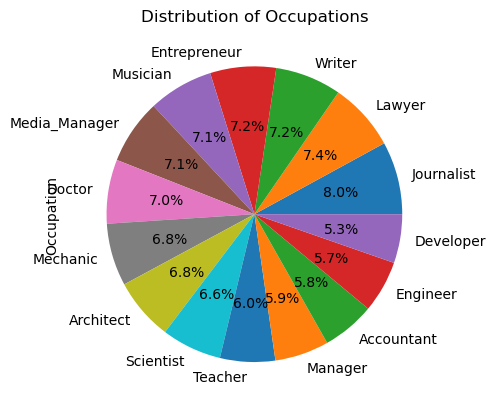

In [32]:
#Occupation
train_df1['Occupation'].value_counts().plot.pie(autopct='%.1f%%')
plt.title("Distribution of Occupations")
plt.show() 

From the above graph, we can see that most of the customers are Journalist(8%).


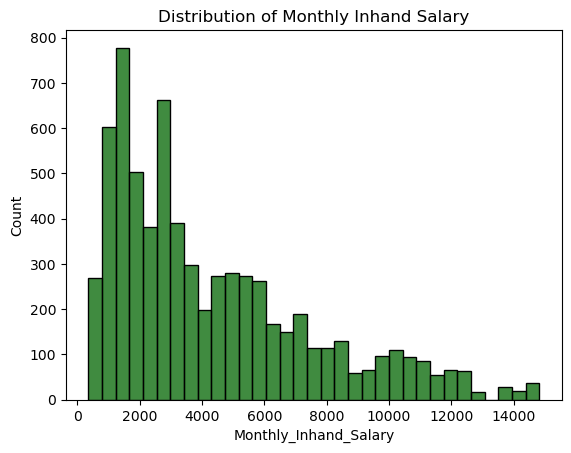

In [33]:
sns.histplot(train_df1['Monthly_Inhand_Salary'], color='darkgreen')
plt.title('Distribution of Monthly Inhand Salary')
plt.show()

The inhand salary distribution is right-skewed. Mean > median. Most of the customers have inhand salary in the range of 1000-5000 dollars.

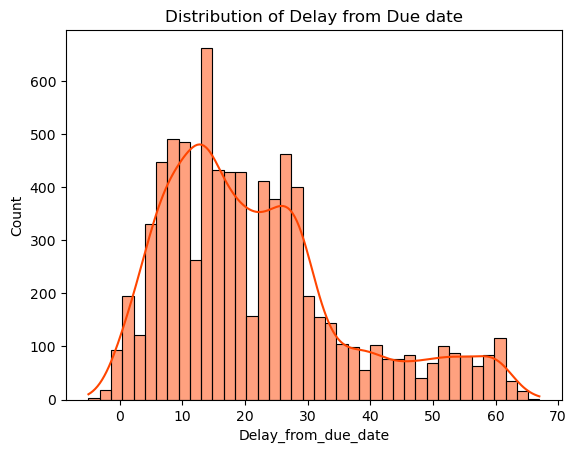

In [34]:
sns.histplot(train_df1['Delay_from_due_date'], kde=True,color='orangered')
plt.title('Distribution of Delay from Due date')
plt.show()


In [35]:
train_df1.Delay_from_due_date.value_counts()

 14    349
 13    314
 9     279
 27    269
 10    268
      ... 
 63      4
-4       2
 67      1
-5       1
 66      1
Name: Delay_from_due_date, Length: 73, dtype: int64

Majority of customers did payment after due date.Only few paid before the due date (-ve values). 
KDE (Kernel Density Estimate) - A smooth curve showing continuous probability density.Maximum count at 14.

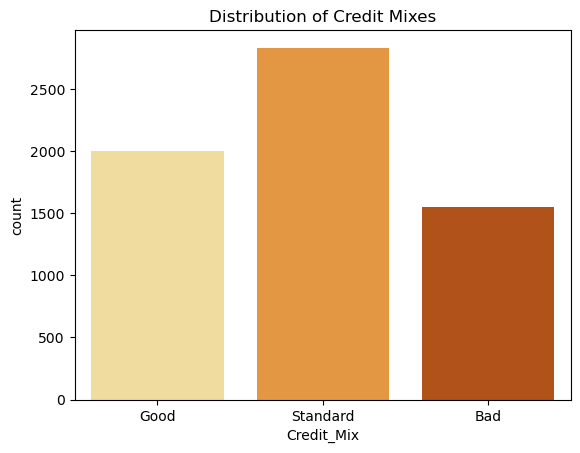

In [36]:
sns.countplot(x= train_df1['Credit_Mix'], palette="YlOrBr") 
#different types of credit accounts of a customer, shows the ability to handle multiple credits
plt.title("Distribution of Credit Mixes")
plt.show()

Majority of credit mix type is standard.

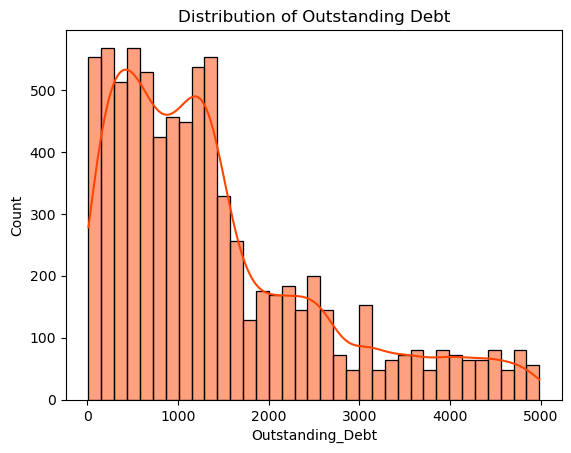

In [37]:
sns.histplot(train_df1['Outstanding_Debt'], kde=True, color='orangered')# debt left to be paid
plt.title('Distribution of Outstanding Debt')
plt.show()

The distribution is skewed to the right. Most people have less amount of debt left to be paid.

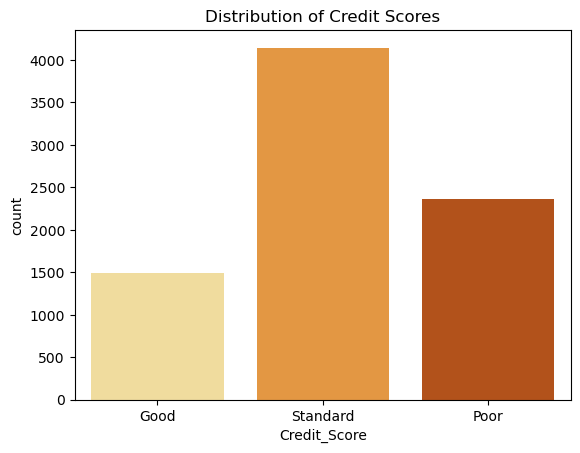

In [38]:
sns.countplot(x= train_df1['Credit_Score'],palette="YlOrBr")
plt.title('Distribution of Credit Scores')
plt.show()


There is an uneven distribution of target column values.

### Bivariate analysis (w.r.t. target)

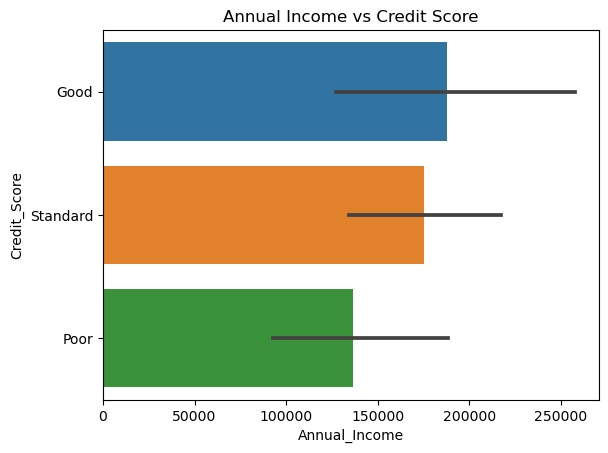

In [39]:
# Annual_Income vs credit score
sns.barplot(x=train_df1['Annual_Income'], y=train_df1['Credit_Score'])
plt.title('Annual Income vs Credit Score')
plt.show()

Customers with higher annual income tend to have better credit scores.

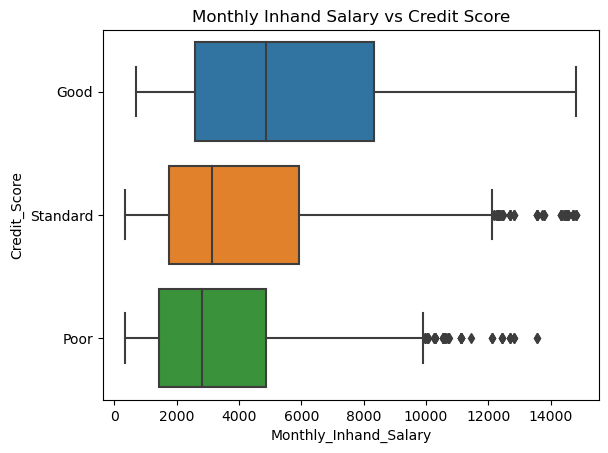

In [40]:
# Monthly_Inhand_Salary vs credit scores
sns.boxplot(y=train_df1['Credit_Score'], x=train_df1['Monthly_Inhand_Salary'])
plt.title('Monthly Inhand Salary vs Credit Score')
plt.show()

The distribution is right skewed(mean>median) for all three credit scorers.Customers with higher monthly inhand salary are showing better credit scores.

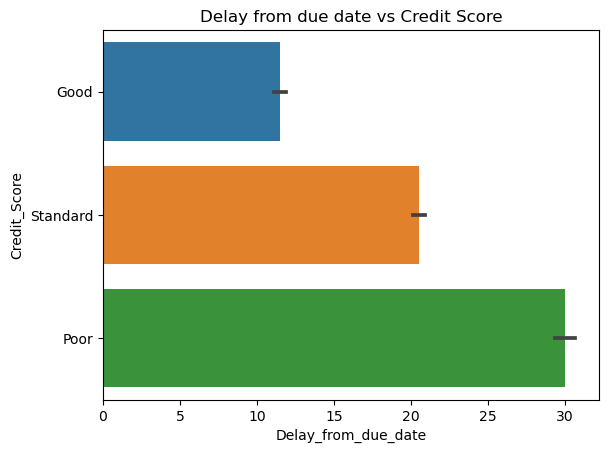

In [41]:
# Delay_from_due_date vs credit score
sns.barplot(y=train_df1['Credit_Score'], x=train_df1['Delay_from_due_date'])
plt.title('Delay from due date vs Credit Score')
plt.show()

Credit scores get poorer as delay from due date increases.

Credit_Score  Good  Poor  Standard
Credit_Mix                        
Bad             20   939       593
Good          1022   322       656
Standard       160   633      2039


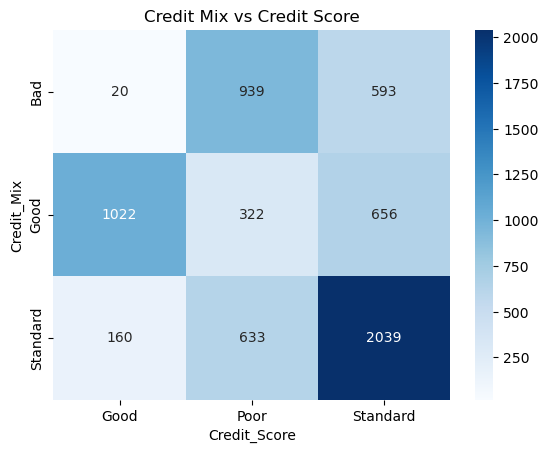

In [42]:
# Credit_Mix vs Credit scores
cat_var = pd.crosstab(train_df1.Credit_Mix, train_df1.Credit_Score)
print(cat_var)
sns.heatmap(cat_var, annot=True,fmt='.4g',cmap='Blues')
plt.title('Credit Mix vs Credit Score')
plt.show()

Customers with better credit mix, shows better credit scores.

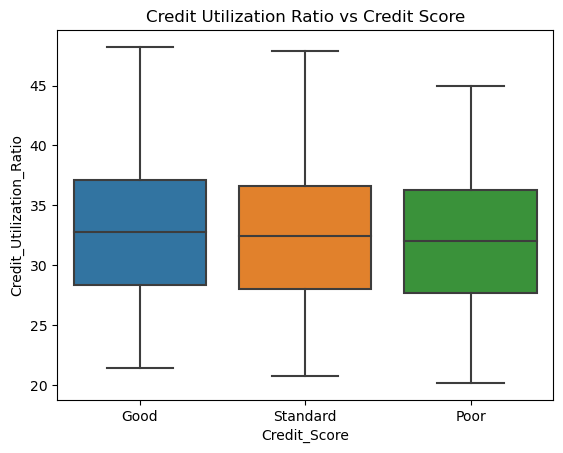

In [43]:
#Credit_Utilization_Ratio vs Credit score
sns.boxplot(y=train_df1['Credit_Utilization_Ratio'], x=train_df1['Credit_Score'])
plt.title('Credit Utilization Ratio vs Credit Score')
plt.show()

Credit Utilization ratio distribution is almost even for good and standard credit scorers.But, the range is slightly lower for poor category.Up to a range increase in Credit Utilization ratio is good for better credit score. Beyond limit, credit utilization negatively affects credit score.

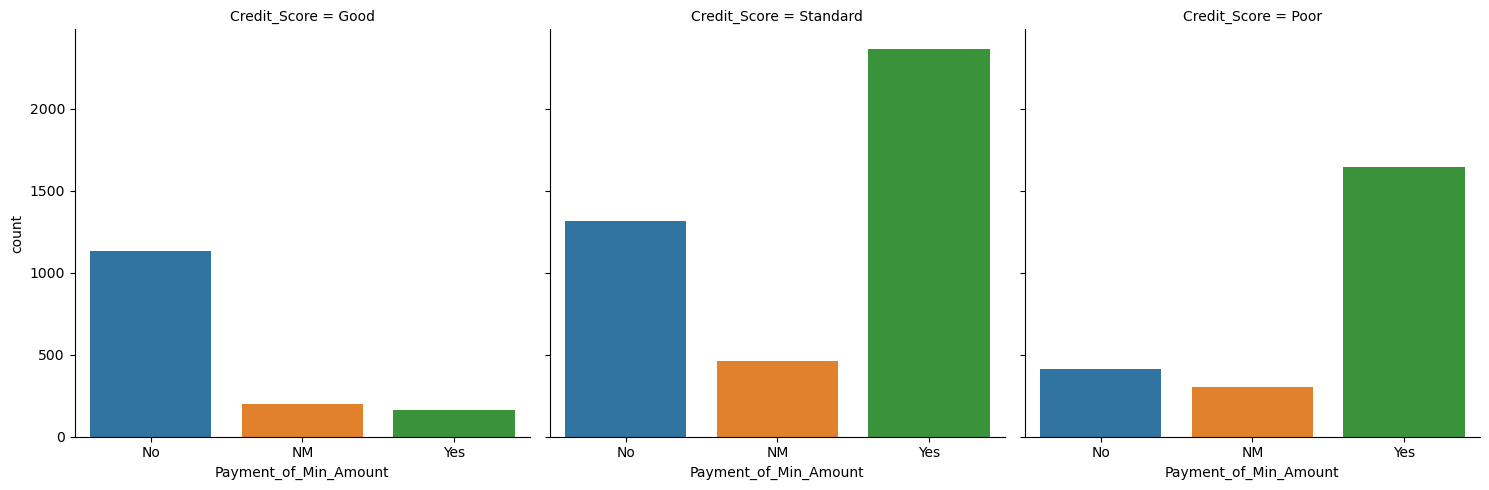

In [44]:
### Distribution of Payment_of_Min_Amount for each Credit Score

sns.catplot(x= 'Payment_of_Min_Amount', col= 'Credit_Score', data = train_df1, kind = 'count', col_wrap = 3)
plt.show()

Most of the Customers with poor and standard credit scores did only the minimum payment. Most of the customers with good credits scores, did more than the minimum payment.From the above graphs, we can see that the most of the customers with a good credit score didn't pay the minimum amount for the loan. 

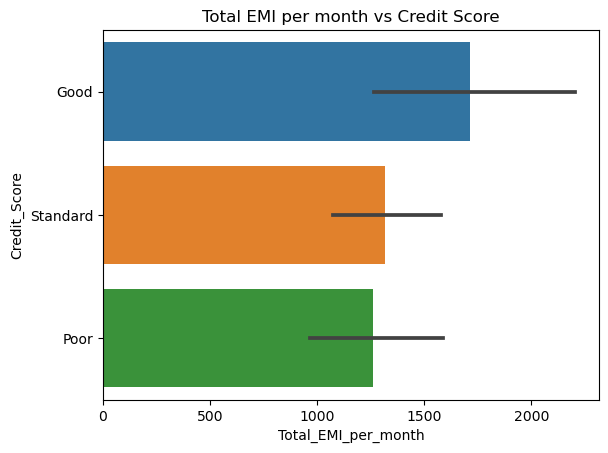

In [45]:
#Total_EMI_per_month vs credit scores
sns.barplot(x=train_df1['Total_EMI_per_month'], y=train_df1['Credit_Score'])
plt.title('Total EMI per month vs Credit Score')
plt.show()

Customers that paid higher EMI tend to have better credit scores.

In [46]:
# change the default number of rows to be displayed 

pd.set_option('display.max_columns', None)

In [47]:
# inspecting the first 15  rows of the dataframe

train_df1.head(5)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,CUS_0xd40,March,500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [48]:
train_df1.dtypes

Customer_ID                  object
Month                        object
Age                           int32
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [49]:
train_df1.isna().sum().sum()

7011

In [50]:
test_df1.isna().sum().sum()

3520

## Handling missing values, Outliers

In [51]:
train_df1.isna().sum().sort_values(ascending = False)

Credit_Mix                  1616
Monthly_Inhand_Salary       1177
Type_of_Loan                 952
Credit_History_Age           741
Payment_Behaviour            636
Occupation                   563
Num_of_Delayed_Payment       560
Amount_invested_monthly      337
Changed_Credit_Limit         165
Num_Credit_Inquiries         159
Monthly_Balance              105
Total_EMI_per_month            0
Payment_of_Min_Amount          0
Credit_Utilization_Ratio       0
Outstanding_Debt               0
Customer_ID                    0
Month                          0
Delay_from_due_date            0
Num_of_Loan                    0
Interest_Rate                  0
Num_Credit_Card                0
Num_Bank_Accounts              0
Annual_Income                  0
Age                            0
Credit_Score                   0
dtype: int64

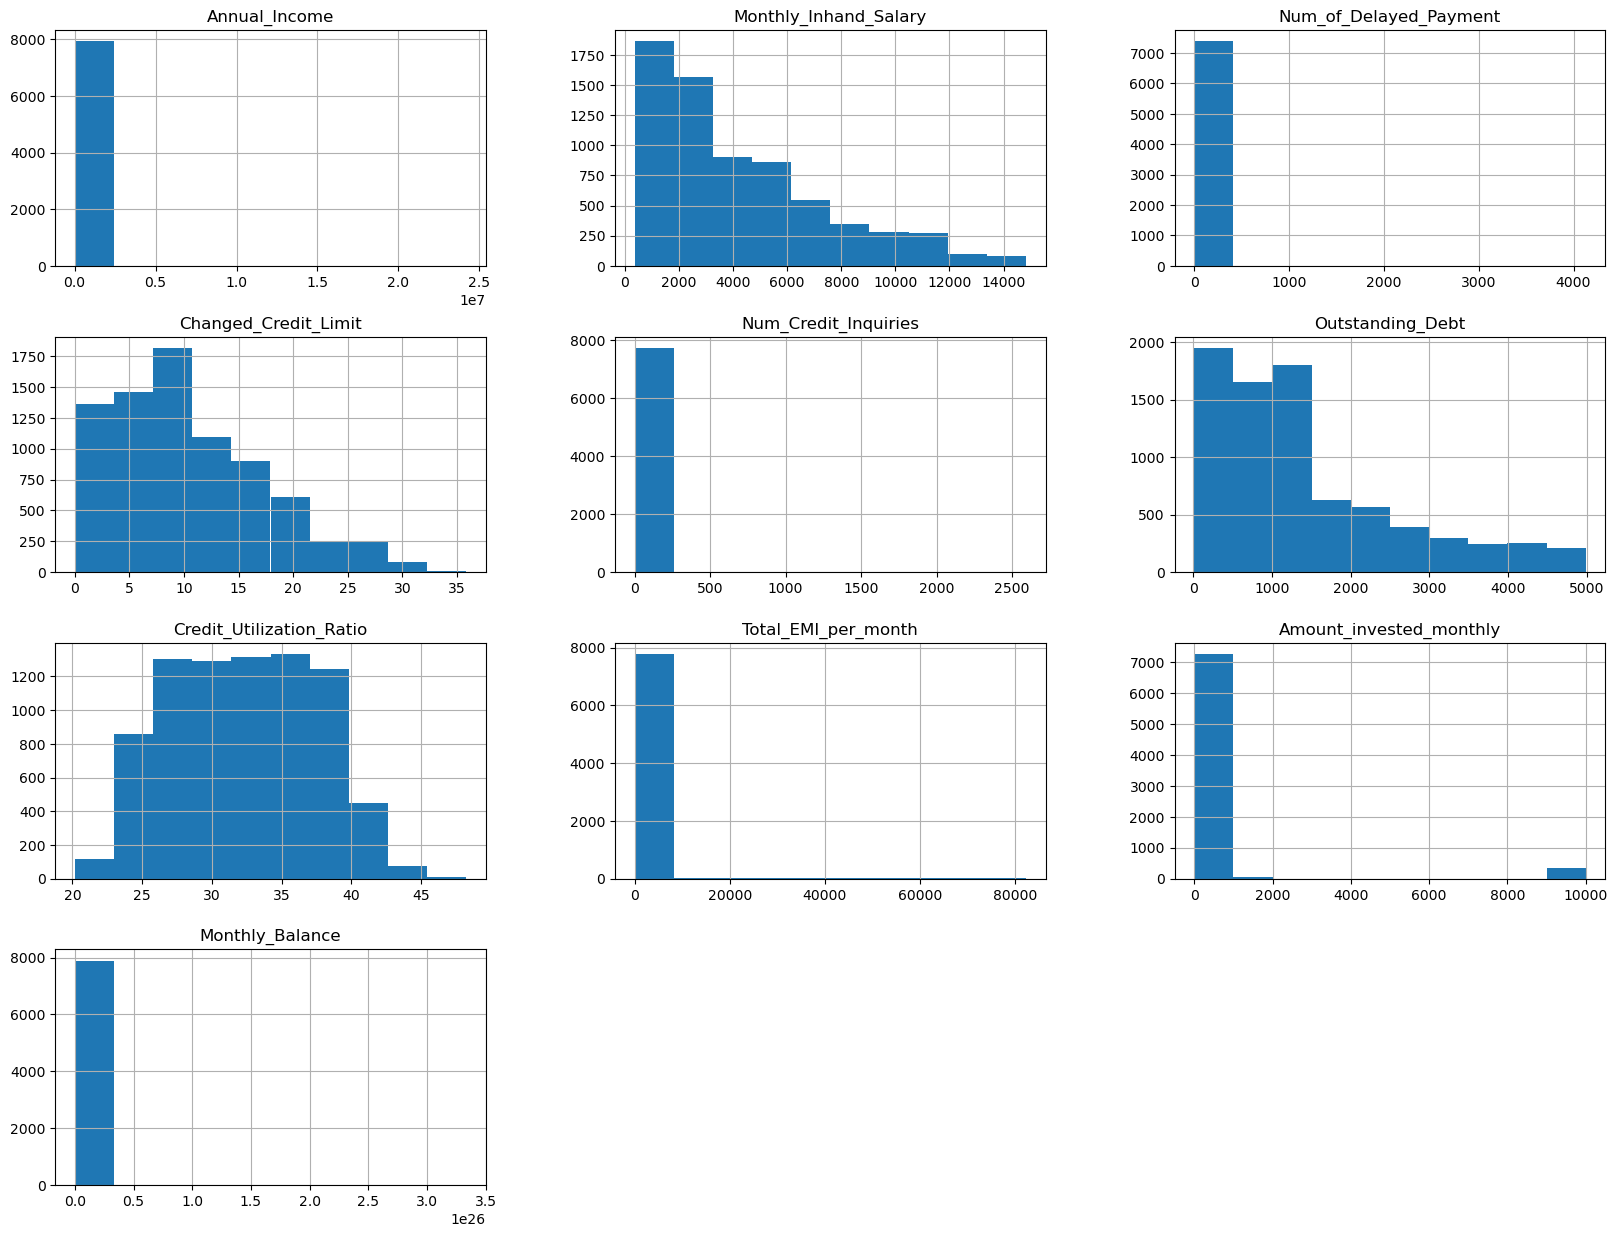

In [52]:
freqgraph = train_df1.select_dtypes(include = ['float'])
freqgraph.hist(figsize =(20,15))
plt.show()

How to fill missing values
- Monthly_Inhand_Salary - Median 
- Num_of_Delayed_Payment - Mode  
- Amount_invested_monthly - Median 
- Changed_Credit_Limit - Mode 
- Num_Credit_Inquiries - Mode 
- Monthly_Balance - Median.

In [53]:
#  drop, Num_Bank_Accounts, Type_of_Loan as they do not contribute to target

train_df1.drop(['Num_Bank_Accounts','Type_of_Loan'],axis =1 , inplace = True )
test_df1.drop(['Num_Bank_Accounts','Type_of_Loan'],axis =1 , inplace = True )

In [54]:
# Filling the null values in Occupation, Monthly_Inhand_Salary,Credit_Mix using mode. 

train_df1['Occupation'] = train_df1.groupby('Customer_ID')['Occupation'].apply(lambda x: x.fillna(x.mode()[0]))

train_df1['Monthly_Inhand_Salary'] = train_df1.groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(lambda x: x.fillna(x.mode()[0]))

train_df1['Credit_Mix'] = train_df1.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: x.fillna(x.mode()[0]))

## fill test data
test_df1['Occupation'] = test_df1.groupby('Customer_ID')['Occupation'].apply(lambda x: x.fillna(x.mode()[0]))

test_df1['Monthly_Inhand_Salary'] = test_df1.groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(lambda x: x.fillna(x.mode()[0]))

test_df1['Credit_Mix'] = train_df1.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: x.fillna(x.mode()[0]))

In [55]:
# no. of delayed payments
train_df1[['Customer_ID','Month','Num_of_Delayed_Payment']].head(15)

,Customer_ID,Month,Num_of_Delayed_Payment
0,CUS_0xd40,January,7.0
1,CUS_0xd40,February,NaN
2,CUS_0xd40,March,7.0
3,CUS_0xd40,April,4.0
4,CUS_0xd40,May,NaN
5,CUS_0xd40,June,4.0
6,CUS_0xd40,July,8.0
7,CUS_0xd40,August,6.0
8,CUS_0x21b1,January,4.0
9,CUS_0x21b1,February,1.0


In [56]:
# fill using forward fill ,as no. of delayed payments depend on previous month value

train_df1['Num_of_Delayed_Payment'] = train_df1['Num_of_Delayed_Payment'].fillna(method='ffill')
test_df1['Num_of_Delayed_Payment'] = test_df1['Num_of_Delayed_Payment'].fillna(method='ffill')

In [57]:
# changed credit limit

train_df1[['Customer_ID','Changed_Credit_Limit']].head(24)

,Customer_ID,Changed_Credit_Limit
0,CUS_0xd40,11.27
1,CUS_0xd40,11.27
2,CUS_0xd40,NaN
3,CUS_0xd40,6.27
4,CUS_0xd40,11.27
5,CUS_0xd40,9.27
6,CUS_0xd40,11.27
7,CUS_0xd40,11.27
8,CUS_0x21b1,5.42
9,CUS_0x21b1,7.42


In [58]:
# replace missing values using groupby mode

train_df1['Changed_Credit_Limit'] = train_df1.groupby('Customer_ID')['Changed_Credit_Limit'].apply(lambda x: x.fillna(x.mode()[0]))
test_df1['Changed_Credit_Limit'] = test_df1.groupby('Customer_ID')['Changed_Credit_Limit'].apply(lambda x: x.fillna(x.mode()[0]))

In [59]:
# changed Num_Credit_Inquiries

train_df1[['Customer_ID','Num_Credit_Inquiries']].head(24)

,Customer_ID,Num_Credit_Inquiries
0,CUS_0xd40,4.0
1,CUS_0xd40,4.0
2,CUS_0xd40,4.0
3,CUS_0xd40,4.0
4,CUS_0xd40,4.0
5,CUS_0xd40,4.0
6,CUS_0xd40,4.0
7,CUS_0xd40,4.0
8,CUS_0x21b1,2.0
9,CUS_0x21b1,2.0


In [60]:
# replace missing values using groupby mode

train_df1['Num_Credit_Inquiries'] = train_df1.groupby('Customer_ID')['Num_Credit_Inquiries'].apply(lambda x: x.fillna(x.mode()[0]))
test_df1['Num_Credit_Inquiries'] = test_df1.groupby('Customer_ID')['Num_Credit_Inquiries'].apply(lambda x: x.fillna(x.mode()[0]))

In [61]:
train_df1['Payment_of_Min_Amount'].value_counts()

Yes    4176
No     2856
NM      968
Name: Payment_of_Min_Amount, dtype: int64

In [62]:
# replace NM with nan
train_df1.loc[train_df1['Payment_of_Min_Amount']=='NM','Payment_of_Min_Amount']=np.nan
test_df1.loc[test_df1['Payment_of_Min_Amount']=='NM','Payment_of_Min_Amount']=np.nan

In [63]:
# fill nan using mode
train_df1['Payment_of_Min_Amount'] = train_df1.groupby('Customer_ID')['Payment_of_Min_Amount'].apply(lambda x: x.fillna(x.mode()[0]))
test_df1['Payment_of_Min_Amount'] = test_df1.groupby('Customer_ID')['Payment_of_Min_Amount'].apply(lambda x: x.fillna(x.mode()[0]))

In [64]:
# changed Amount_invested_monthly

train_df1[train_df1['Amount_invested_monthly'].isna()==True]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
60,CUS_0x5407,May,30,Media_Manager,34081.380,2611.115000,7,15,3,27,14.0,17.13,5.0,Standard,1704.18,30.206214,14 Years and 11 Months,Yes,70.478333,NaN,High_spent_Large_value_payments,397.228355,Standard
61,CUS_0x5407,June,30,Media_Manager,34081.380,2611.115000,7,15,100,30,14.0,18.13,5.0,Standard,1704.18,31.170872,15 Years and 0 Months,Yes,70.478333,NaN,NaN,410.674366,Standard
91,CUS_0xc0ab,April,33,Engineer,88640.240,7266.686667,6,1,2,4,2.0,3.51,3.0,Good,950.36,31.828536,25 Years and 8 Months,No,135.173371,NaN,Low_spent_Small_value_payments,86.636120,Standard
111,CUS_0x6c66,August,39,Manager,8701.545,519.128750,5,32,7,23,9.0,8.86,9.0,Standard,2602.69,28.815537,9 Years and 6 Months,Yes,36.548197,NaN,Low_spent_Small_value_payments,264.772051,Poor
181,CUS_0xac86,June,20,Entrepreneur,106733.130,8873.427500,4,1,0,5,6.0,0.14,0.0,Good,76.23,31.727604,NaN,No,0.000000,NaN,High_spent_Medium_value_payments,913.031655,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,CUS_0xa374,March,38,Doctor,34680.440,3136.036667,3,18,0,20,9.0,14.72,0.0,Standard,551.18,24.618924,27 Years and 1 Months,Yes,0.000000,NaN,High_spent_Medium_value_payments,450.501090,Standard
7839,CUS_0xa83c,August,22,Doctor,23195.180,1768.931667,6,14,5,6,11.0,14.52,8.0,Standard,458.80,30.434485,16 Years and 10 Months,Yes,53.429503,NaN,High_spent_Medium_value_payments,314.578740,Standard
7845,CUS_0x5088,June,47,Teacher,68375.370,5914.947500,3,17,1,20,13.0,3.56,1.0,Standard,804.61,32.141302,NaN,No,38.408243,NaN,High_spent_Medium_value_payments,604.491779,Standard
7946,CUS_0x6895,March,42,Entrepreneur,35064.500,2949.041667,7,33,7,38,20.0,18.54,10.0,Standard,2543.44,28.871749,NaN,Yes,132.256066,NaN,High_spent_Medium_value_payments,309.601958,Poor


In [65]:
# handle outliers before filling null values
# replace 10,000 with nan 

train_df1['Amount_invested_monthly'] = train_df1['Amount_invested_monthly'].replace(10000, np.nan)
test_df1['Amount_invested_monthly'] = test_df1['Amount_invested_monthly'].replace(10000, np.nan)

In [66]:
#  fill all null values using median 

train_df1['Amount_invested_monthly'] = train_df1.groupby('Customer_ID')['Amount_invested_monthly'].apply(lambda x: x.fillna(x.median()))
test_df1['Amount_invested_monthly'] = test_df1.groupby('Customer_ID')['Amount_invested_monthly'].apply(lambda x: x.fillna(x.median()))

In [67]:
# groupby and fill payment behaviour using mode

train_df1['Payment_Behaviour'] = train_df1.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.fillna(x.mode()[0]))
test_df1['Payment_Behaviour'] = test_df1.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.fillna(x.mode()[0]))

In [68]:
# find the extreme value of Monthly_Balance

train_df1[train_df1['Monthly_Balance']== max(train_df1['Monthly_Balance'])] 


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5545,CUS_0x9885,February,17,Developer,41086.4,3660.866667,4,6,7,10,17.0,17.86,10.0,Standard,113.98,34.826541,11 Years and 6 Months,Yes,145.54432,201.142993,Low_spent_Medium_value_payments,3.333333e+26,Standard


In [69]:
# replace the extreme value of Monthly_Balance with nan

train_df1['Monthly_Balance'] = train_df1['Monthly_Balance'].replace(max(train_df1['Monthly_Balance']), np.nan)
test_df1['Monthly_Balance'] = test_df1['Monthly_Balance'].replace(max(test_df1['Monthly_Balance']), np.nan)

In [70]:
# use median to fill nan values

train_df1['Monthly_Balance'] = train_df1.groupby('Customer_ID')['Monthly_Balance'].apply(lambda x: x.fillna(x.median()))
test_df1['Monthly_Balance'] = test_df1.groupby('Customer_ID')['Monthly_Balance'].apply(lambda x: x.fillna(x.median()))


### Feature Engineering

In [71]:
train_df1['Credit_History_Age']

0       22 Years and 1 Months
1                         NaN
2       22 Years and 3 Months
3       22 Years and 4 Months
4       22 Years and 5 Months
                ...          
7995    25 Years and 0 Months
7996    25 Years and 1 Months
7997    25 Years and 2 Months
7998                      NaN
7999    25 Years and 4 Months
Name: Credit_History_Age, Length: 8000, dtype: object

In [72]:
# to extract numeric part of Credit History age column
def convert_to_month(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
        #print(num1, num2)
        return (num1*12)+num2
    else:
        return x

In [73]:
# convert age to months
train_df1['Credit_History_Age'] = train_df1.Credit_History_Age.apply(lambda x: convert_to_month(x)).astype(float)
test_df1['Credit_History_Age'] = test_df1.Credit_History_Age.apply(lambda x: convert_to_month(x)).astype(float)


In [74]:
# fill the missing values in Credit History Age

train_df1['Credit_History_Age'] = train_df1.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x: x.fillna(x.mode()[0]))
test_df1['Credit_History_Age'] = test_df1.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x: x.fillna(x.mode()[0]))

In [75]:
train_df1.isna().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [76]:
test_df1.isna().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

We have successfully removed null values from train dataset and test dataset.

### Handling Outliers

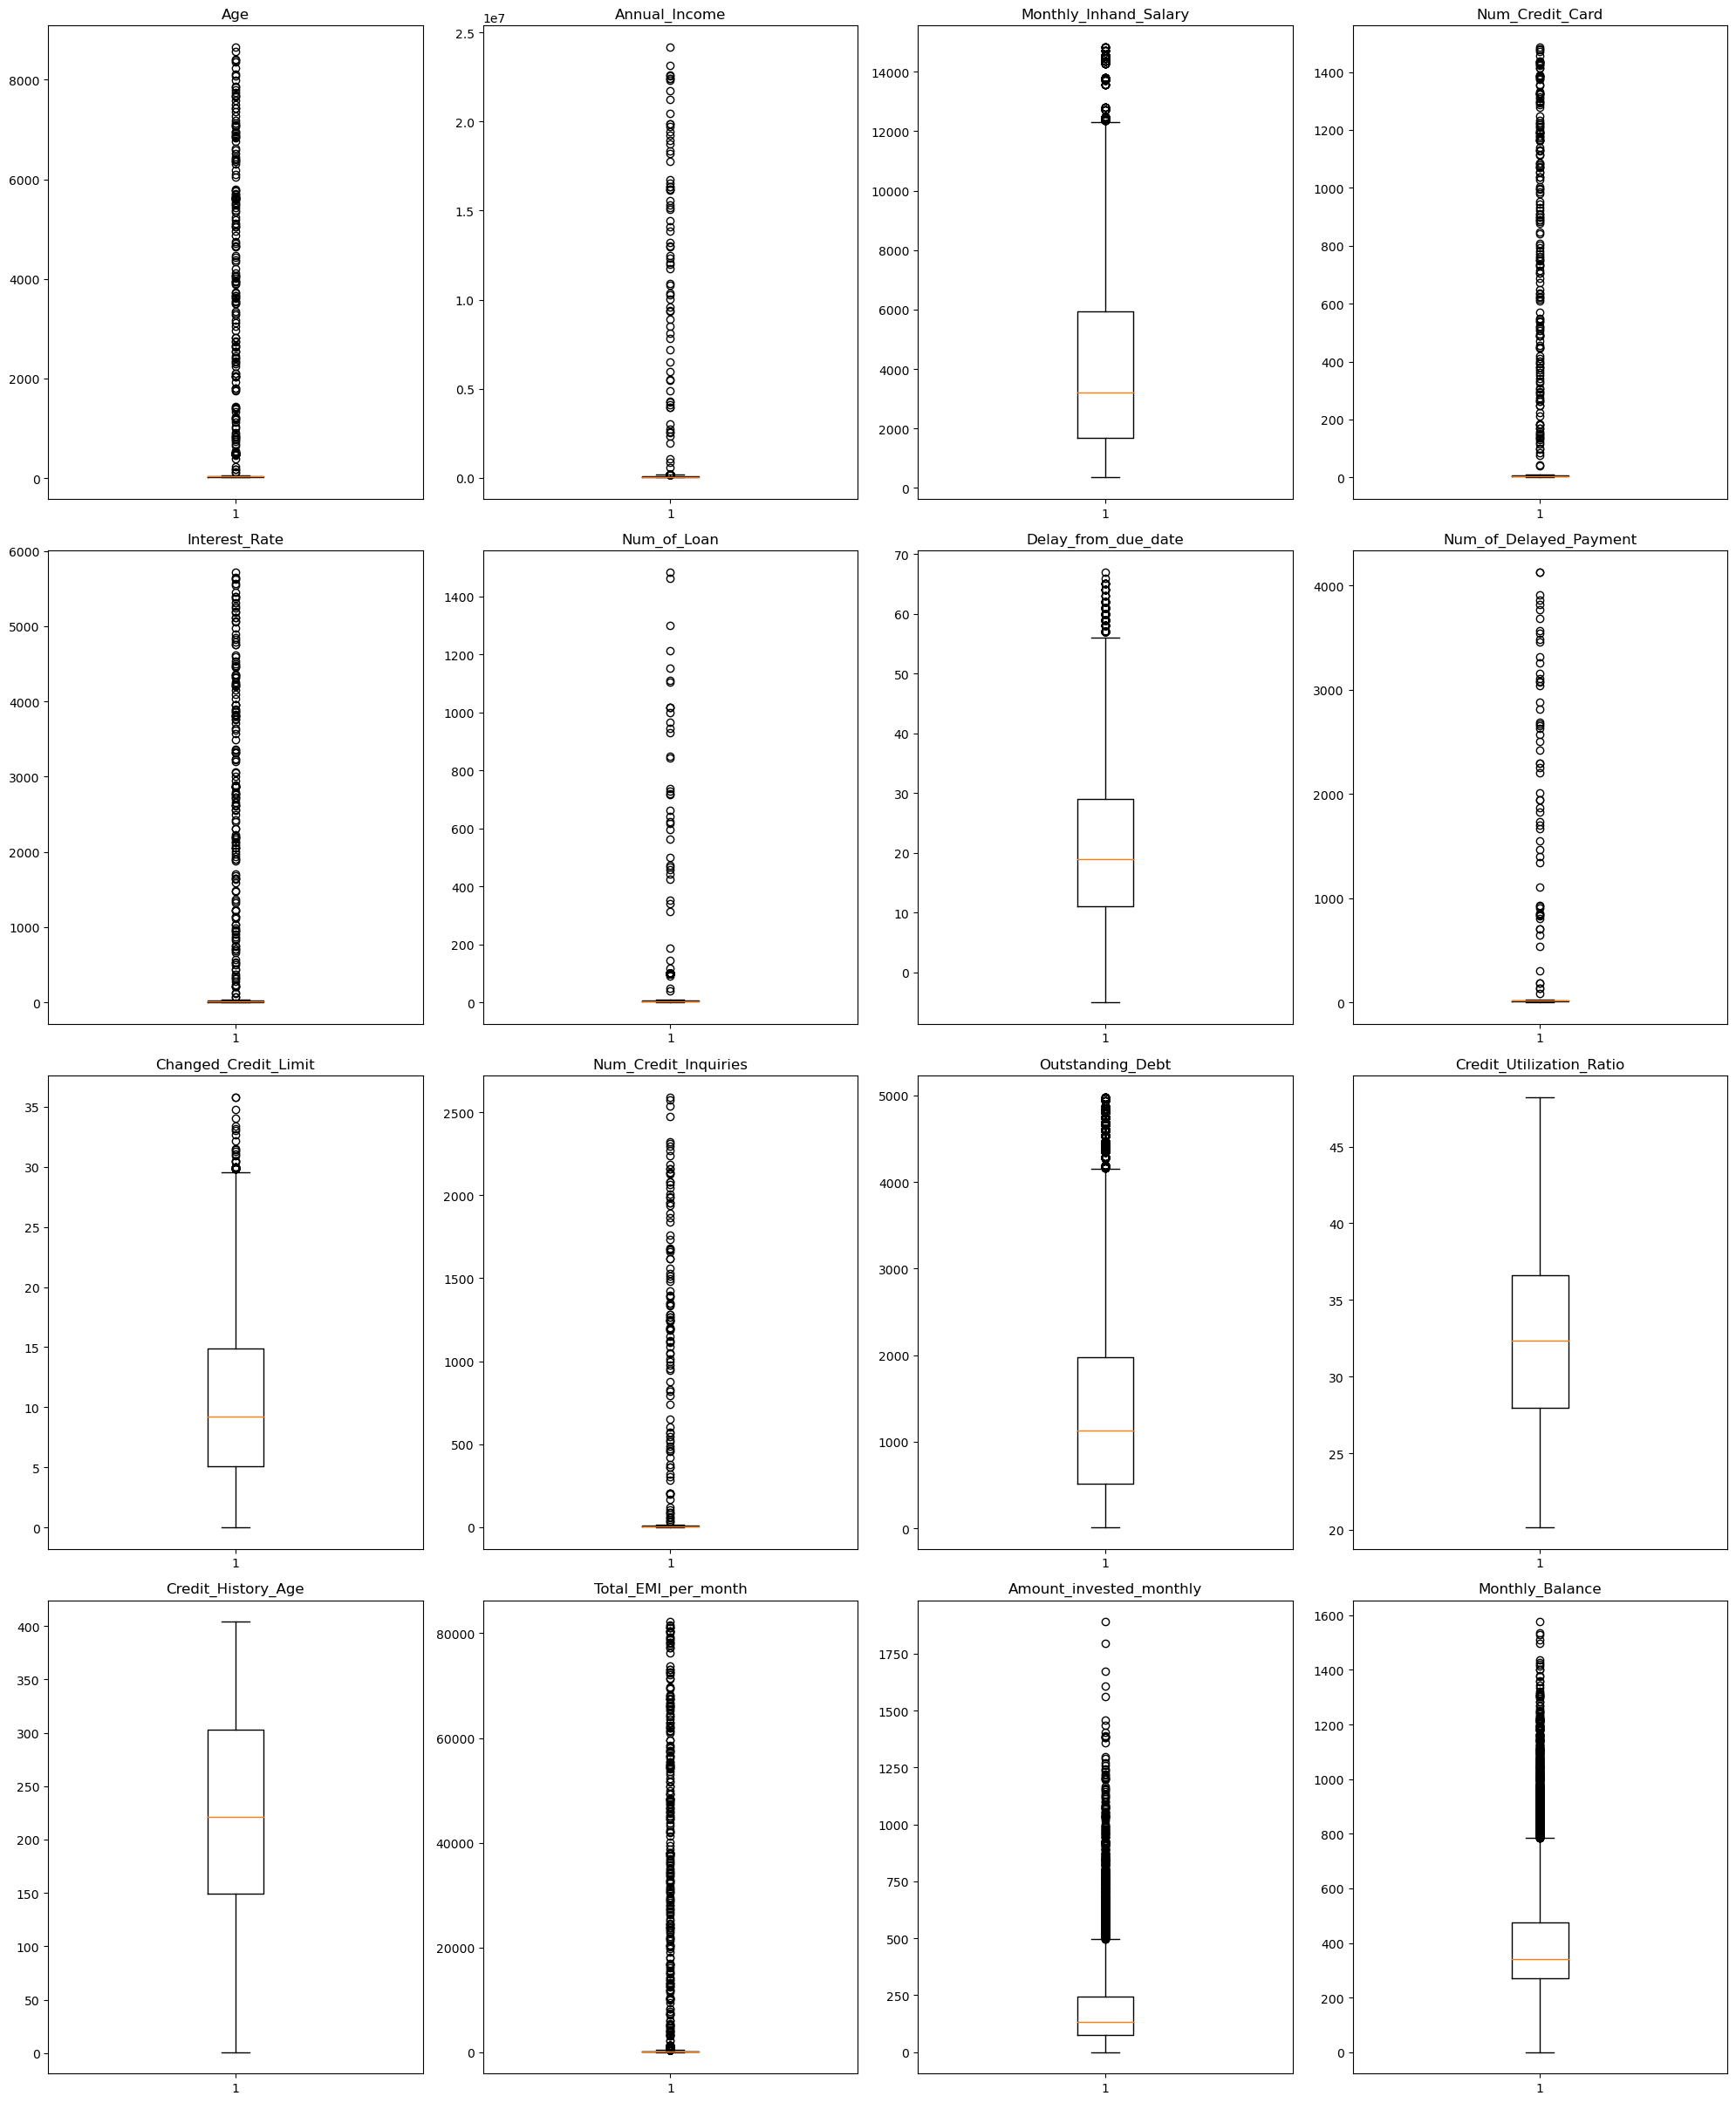

In [77]:
#Box plot of numerical columns

num_col = train_df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20,30))

for i, variable in enumerate(num_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(train_df1[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

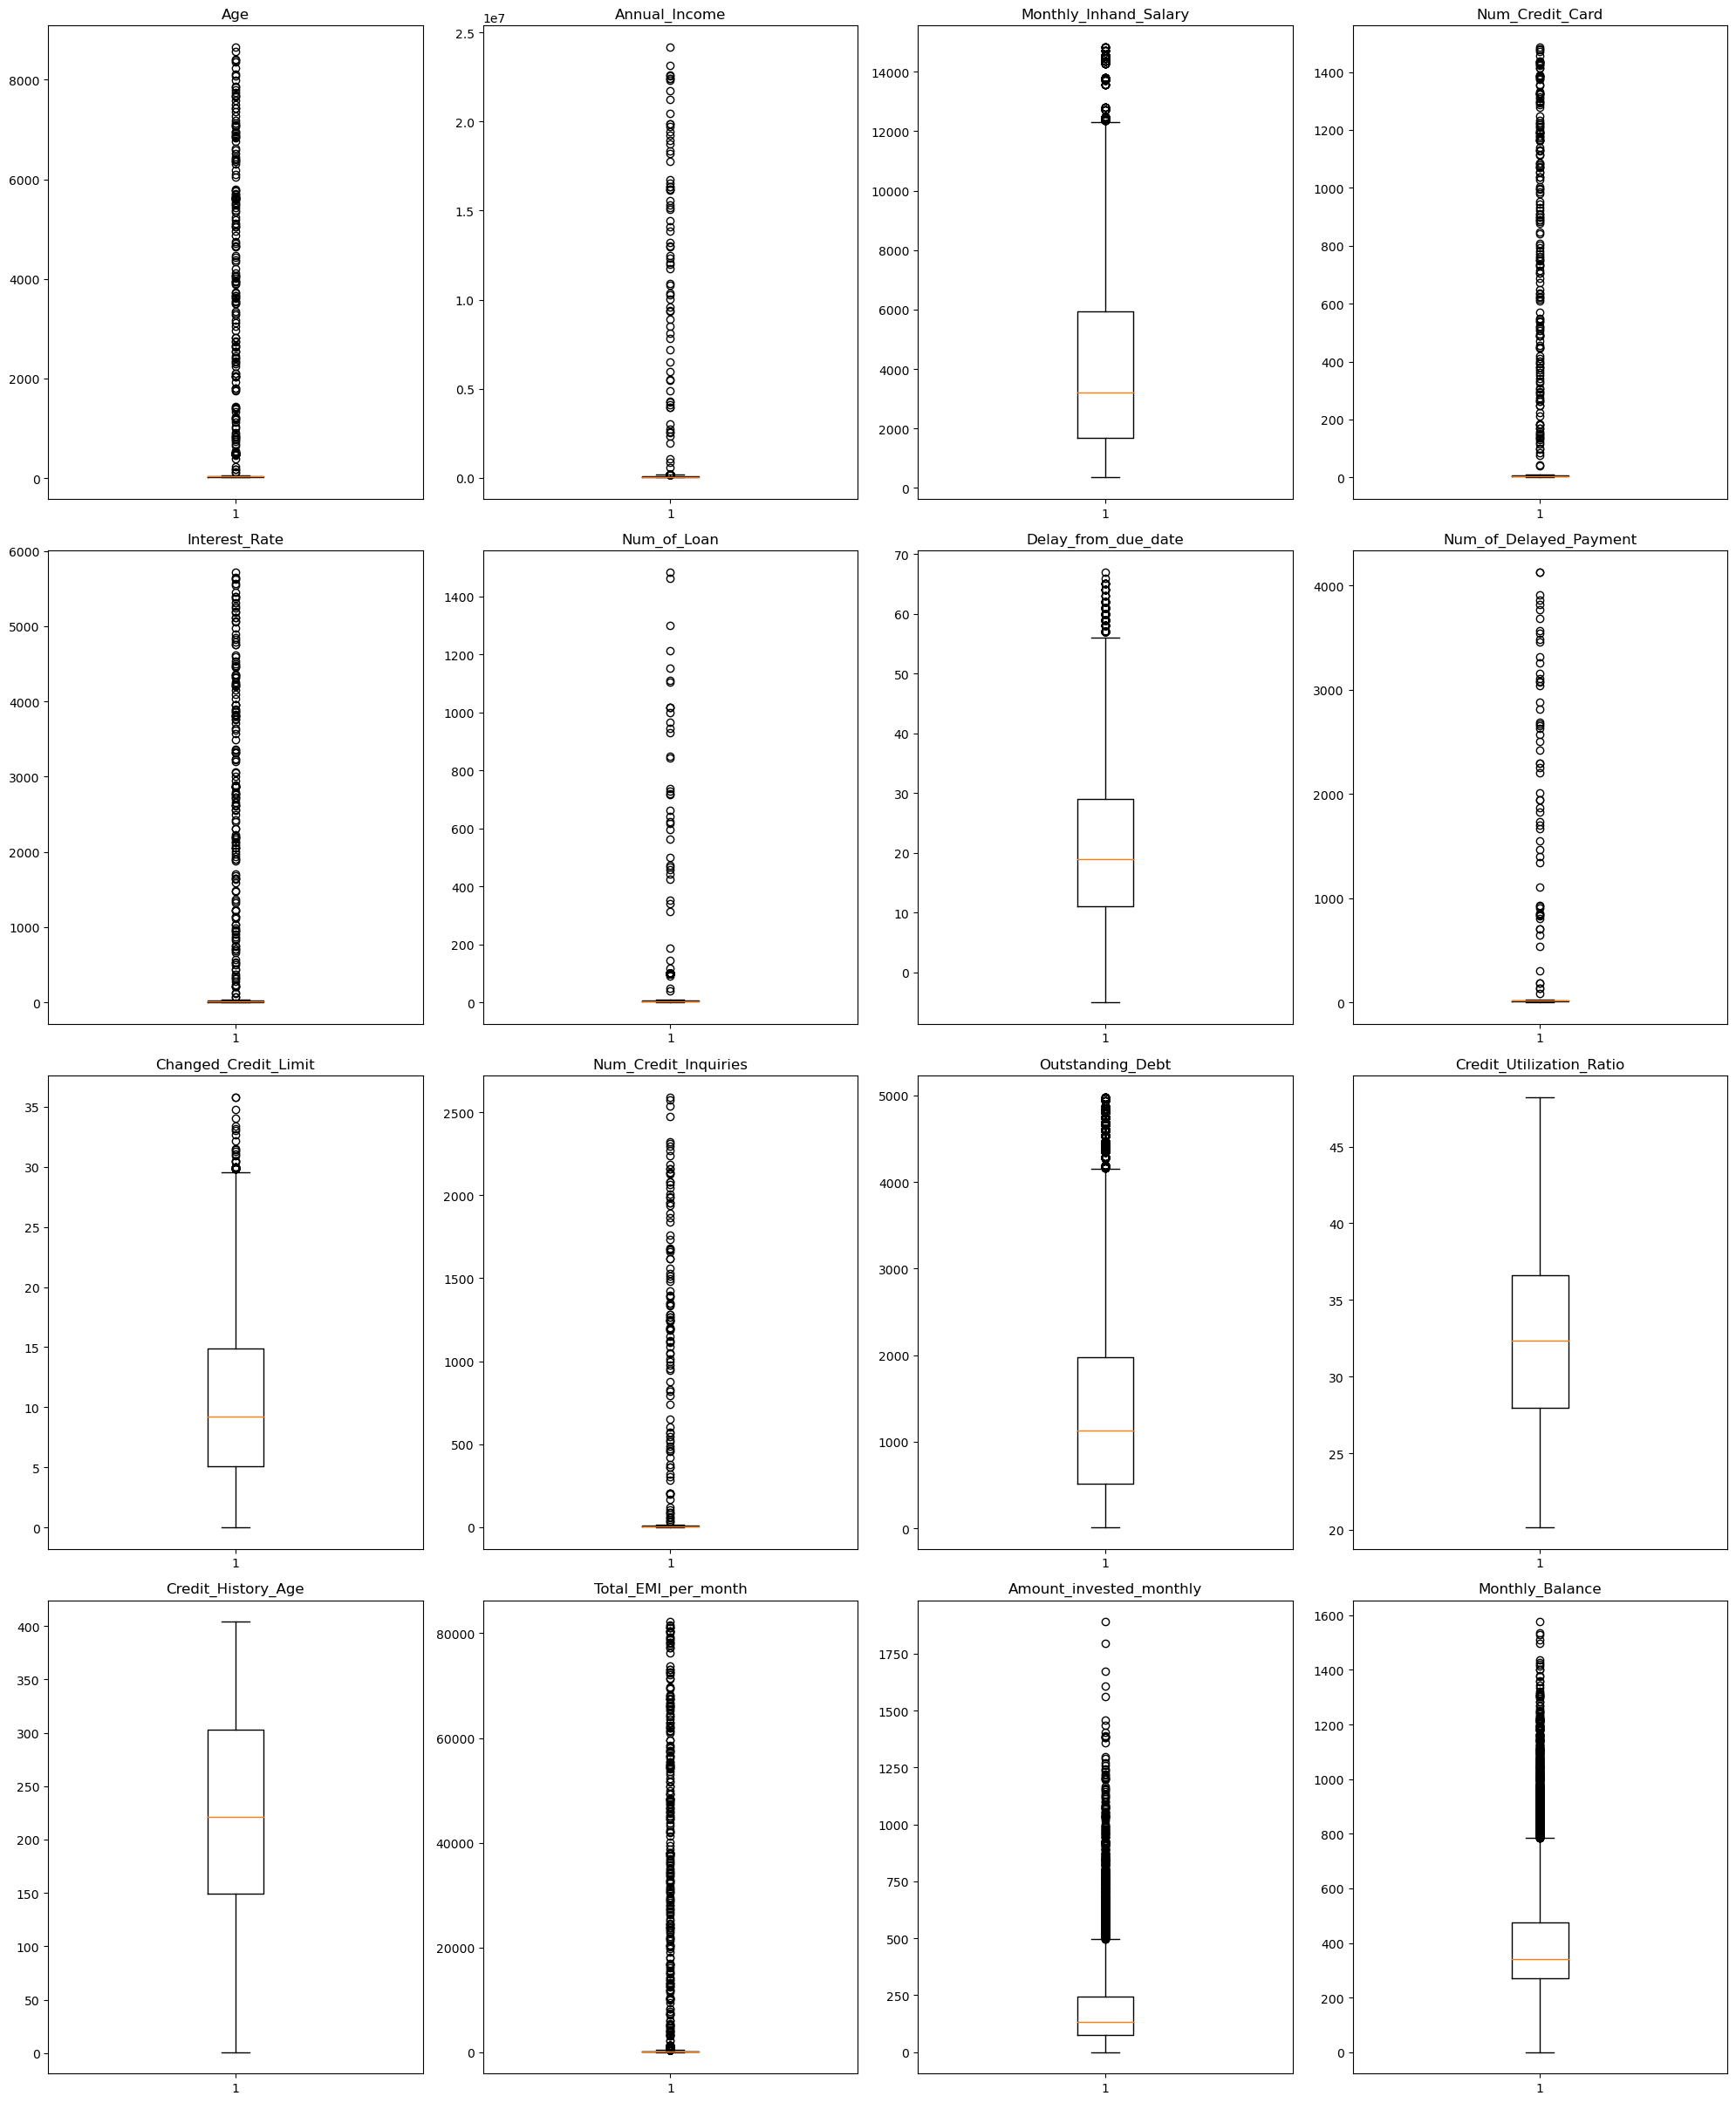

In [78]:
num_col = test_df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20,30))

for i, variable in enumerate(num_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(train_df1[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

Columns whose extreme values need to be removed :

-Age, Annual_Income, Monthly_Inhand_Salary, Num_Credit_Card, Interest_Rate, Num_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Outstanding_Debt,Total_EMI_per_month, Monthly_Balance.

In [79]:
# drop the other columns

num_col1=train_df1.drop(['Credit_Score','Credit_History_Age','Payment_of_Min_Amount','Payment_Behaviour','Credit_Mix','Customer_ID','Month','Occupation','Delay_from_due_date','Changed_Credit_Limit','Monthly_Balance','Amount_invested_monthly','Credit_Utilization_Ratio'], axis = 1)

In [80]:
num_col1.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month
0,23,19114.12,1824.843333,4,3,4,7.0,4.0,809.98,49.574949
1,23,19114.12,1824.843333,4,3,4,7.0,4.0,809.98,49.574949
2,500,19114.12,1824.843333,4,3,4,7.0,4.0,809.98,49.574949
3,23,19114.12,1824.843333,4,3,4,4.0,4.0,809.98,49.574949
4,23,19114.12,1824.843333,4,3,4,4.0,4.0,809.98,49.574949


In [81]:
# Identify the outliers and remove 

for i in num_col1:
    Q1=train_df1[i].quantile(0.25) # 25th quantile
    Q3=train_df1[i].quantile(0.75) # 75th quantile
    IQR = Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    train_df1[i] = np.clip(train_df1[i], Lower_Whisker, Upper_Whisker)

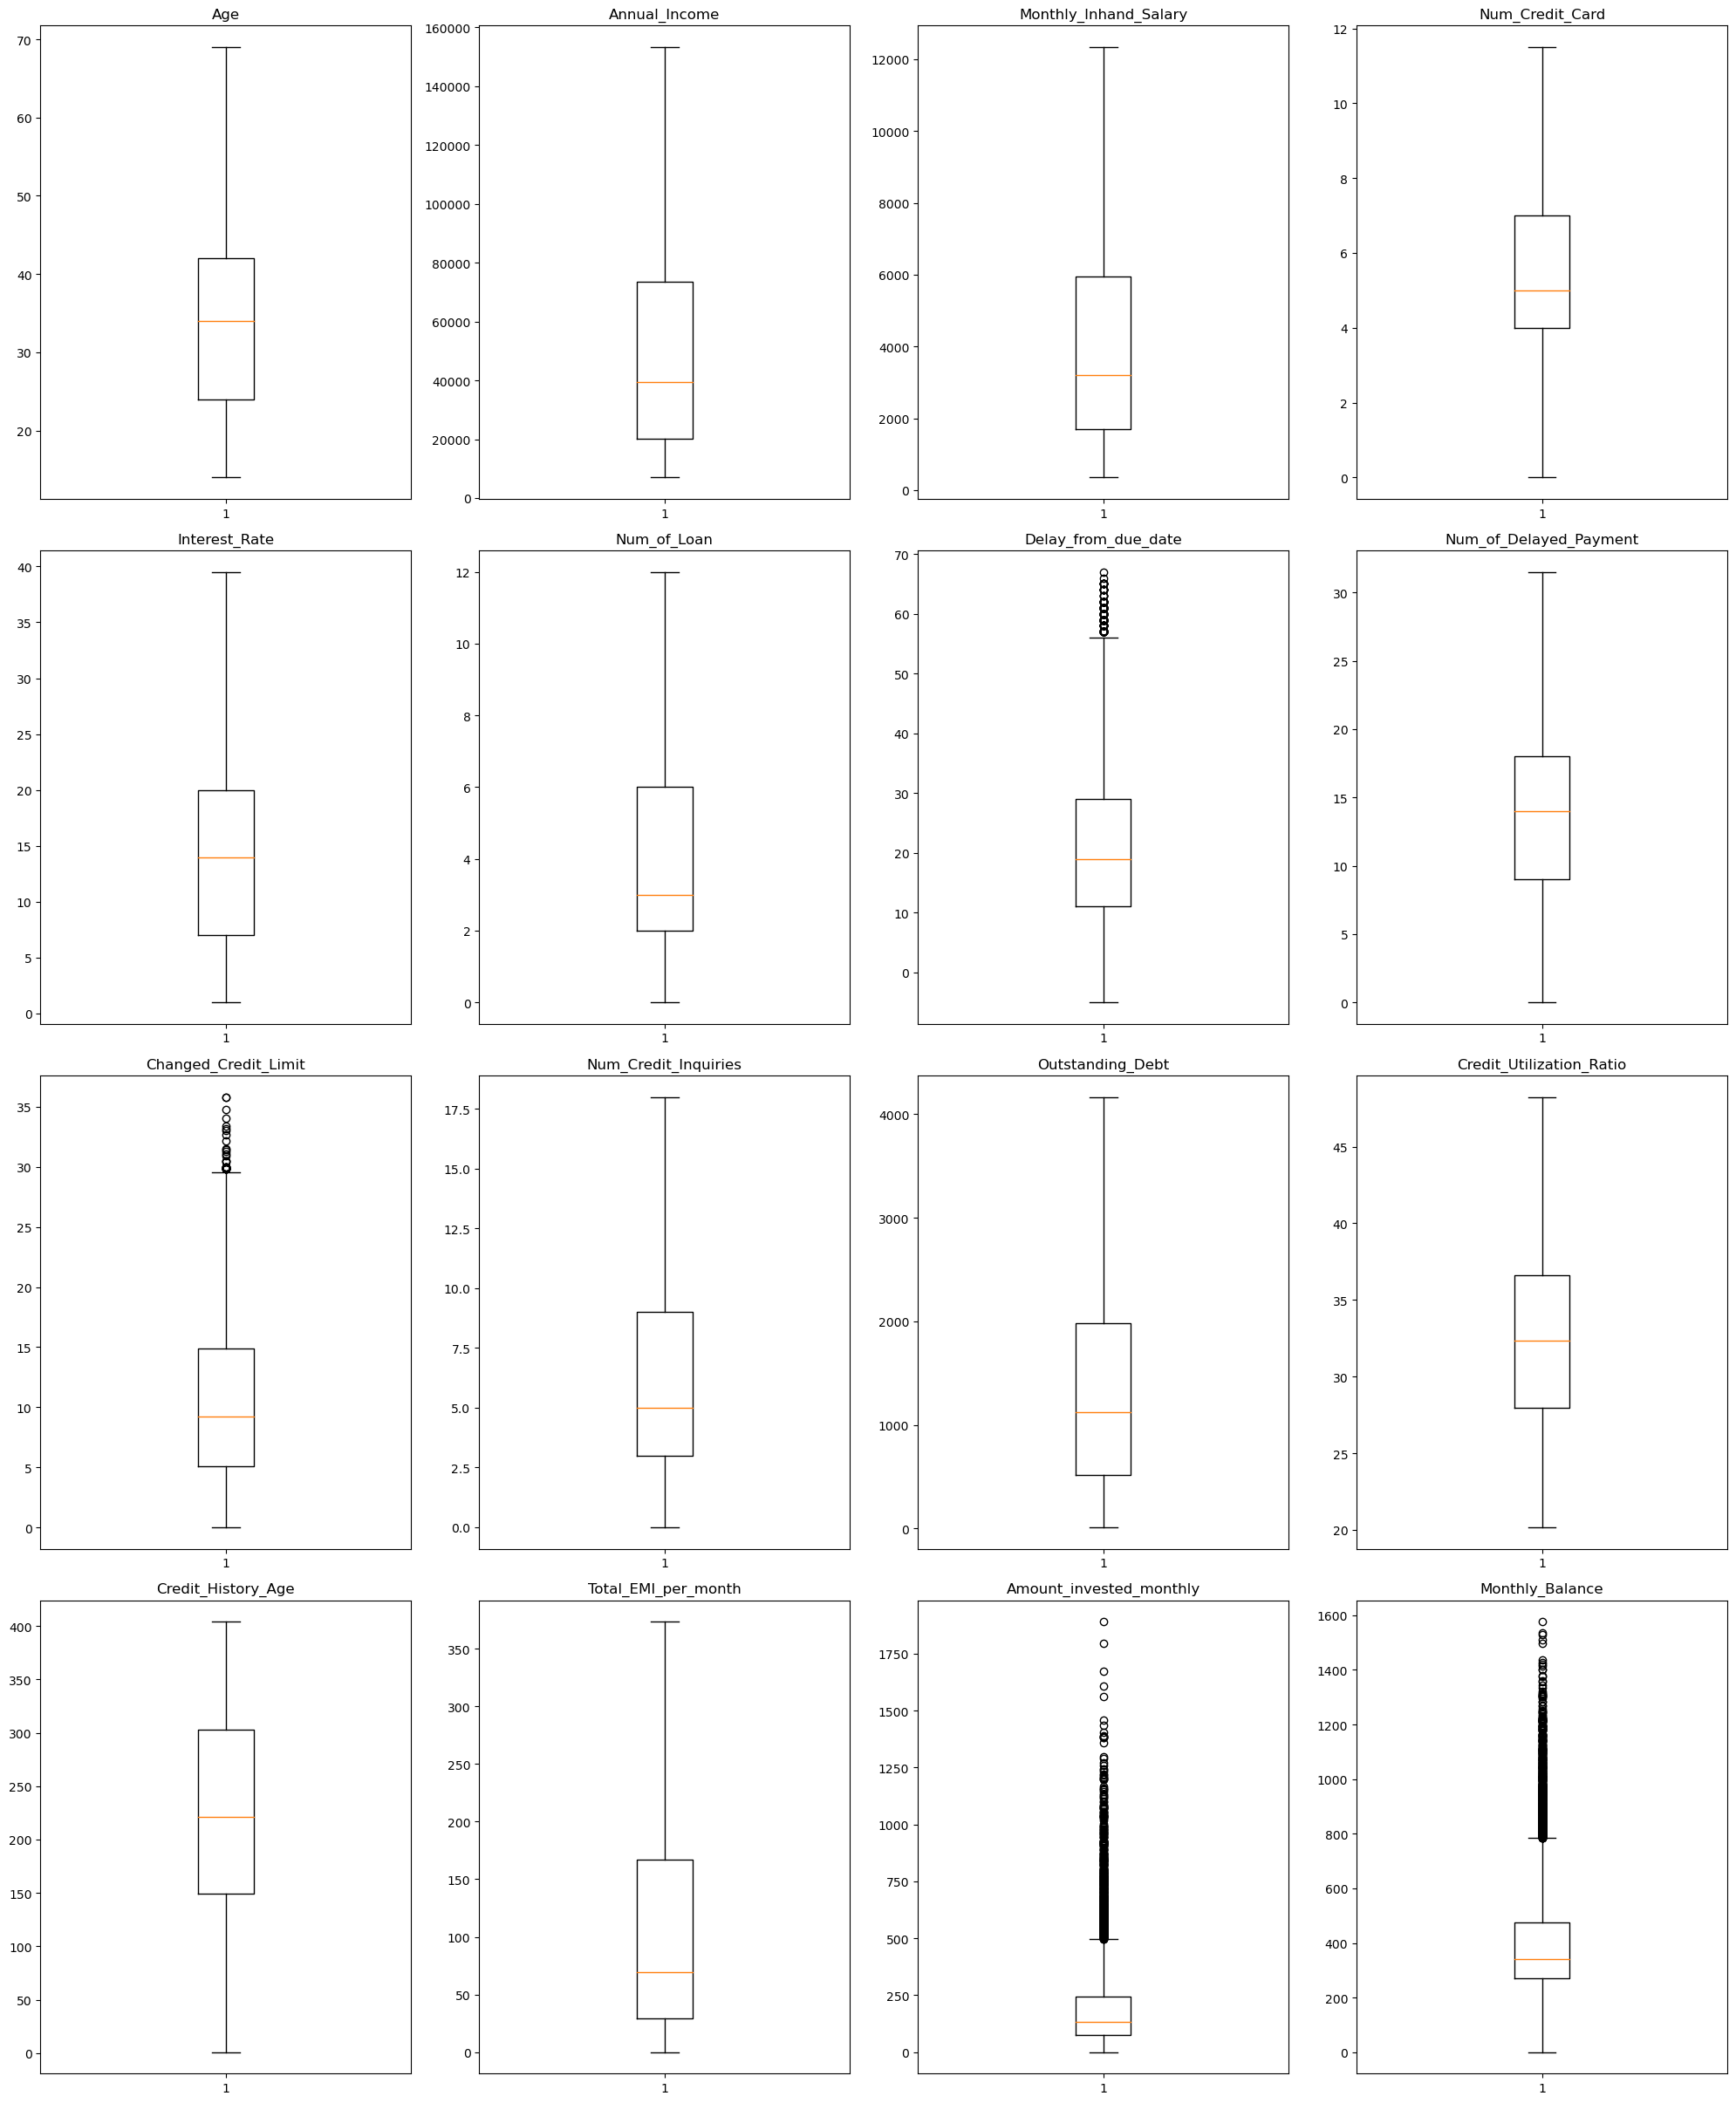

In [82]:
# PLot the numerical columns
plt.figure(figsize=(20,30))
for i, variable in enumerate(num_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(train_df1[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

### ENCODING

Categorical columns:
    
- Customer_ID -drop column
- Month - Label encode
- Occupation - Label encode
- Credit_Mix - One Hot encode
- Payment_of_Min_Amount - One Hot encode
- Payment_Behaviour - One Hot Encode
- Credit_Score - map target as 0,1,2

In [83]:
# drop Customer ID
train_df1 = train_df1.drop('Customer_ID', axis=1)
test_df1 = test_df1.drop('Customer_ID', axis=1)

In [84]:
# drop payment behaviour
train_df1 = train_df1.drop('Payment_Behaviour', axis=1)
test_df1 = test_df1.drop('Payment_Behaviour', axis=1)

In [85]:
train_df1

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,3,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,312.494089,Good
1,February,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,-1,7.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,284.629163,Good
2,March,69.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,3,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,331.209863,Good
3,April,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,223.451310,Good
4,May,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,April,52.0,Lawyer,35724.37,3149.030833,3.0,7.0,4.0,27,9.0,5.15,1.0,Good,18.29,34.545915,300.0,No,86.135097,69.820773,418.947213,Poor
7996,May,52.0,Lawyer,35724.37,3149.030833,3.0,7.0,4.0,27,10.0,5.15,1.0,Good,18.29,27.779343,301.0,No,86.135097,189.708405,309.059581,Poor
7997,June,52.0,Lawyer,35724.37,3149.030833,3.0,7.0,4.0,27,10.0,5.15,1.0,Good,18.29,39.153719,302.0,No,86.135097,73.407661,395.360324,Standard
7998,July,52.0,Lawyer,35724.37,3149.030833,3.0,7.0,4.0,28,12.0,1.85,1.0,Good,18.29,33.486230,297.0,No,86.135097,85.767950,403.000036,Poor


In [86]:
train_df1.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [87]:
train_df1.Credit_Mix.value_counts()

Standard    3560
Good        2496
Bad         1944
Name: Credit_Mix, dtype: int64

In [88]:
replace_map = {'Payment_of_Min_Amount': {'Yes': 1, 'No': 0} }

train_df1.replace(replace_map, inplace=True)
test_df1.replace(replace_map, inplace=True)

In [89]:
train_df1

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,3,7.0,11.27,4.0,Good,809.98,26.822620,265.0,0,49.574949,80.415295,312.494089,Good
1,February,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,-1,7.0,11.27,4.0,Good,809.98,31.944960,265.0,0,49.574949,118.280222,284.629163,Good
2,March,69.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,3,7.0,11.27,4.0,Good,809.98,28.609352,267.0,0,49.574949,81.699521,331.209863,Good
3,April,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,0,49.574949,199.458074,223.451310,Good
4,May,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,0,49.574949,41.420153,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,April,52.0,Lawyer,35724.37,3149.030833,3.0,7.0,4.0,27,9.0,5.15,1.0,Good,18.29,34.545915,300.0,0,86.135097,69.820773,418.947213,Poor
7996,May,52.0,Lawyer,35724.37,3149.030833,3.0,7.0,4.0,27,10.0,5.15,1.0,Good,18.29,27.779343,301.0,0,86.135097,189.708405,309.059581,Poor
7997,June,52.0,Lawyer,35724.37,3149.030833,3.0,7.0,4.0,27,10.0,5.15,1.0,Good,18.29,39.153719,302.0,0,86.135097,73.407661,395.360324,Standard
7998,July,52.0,Lawyer,35724.37,3149.030833,3.0,7.0,4.0,28,12.0,1.85,1.0,Good,18.29,33.486230,297.0,0,86.135097,85.767950,403.000036,Poor


#### LABEL ENCODING

In [90]:
#import library
from sklearn.preprocessing import LabelEncoder

In [91]:
#fit the model
label_encoder=LabelEncoder()

In [92]:
for i in ['Month', 'Occupation']:  
    train_df1[i]=label_encoder.fit_transform(train_df1[i])
    le_name_mapping =dict((zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
    print(le_name_mapping)

{'April': 0, 'August': 1, 'February': 2, 'January': 3, 'July': 4, 'June': 5, 'March': 6, 'May': 7}
{'Accountant': 0, 'Architect': 1, 'Developer': 2, 'Doctor': 3, 'Engineer': 4, 'Entrepreneur': 5, 'Journalist': 6, 'Lawyer': 7, 'Manager': 8, 'Mechanic': 9, 'Media_Manager': 10, 'Musician': 11, 'Scientist': 12, 'Teacher': 13, 'Writer': 14}


In [93]:
for i in ['Month', 'Occupation']:  
    test_df1[i]=label_encoder.fit_transform(test_df1[i])
    le_name_mapping =dict((zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
    print(le_name_mapping)

{'December': 0, 'November': 1, 'October': 2, 'September': 3}
{'Accountant': 0, 'Architect': 1, 'Developer': 2, 'Doctor': 3, 'Engineer': 4, 'Entrepreneur': 5, 'Journalist': 6, 'Lawyer': 7, 'Manager': 8, 'Mechanic': 9, 'Media_Manager': 10, 'Musician': 11, 'Scientist': 12, 'Teacher': 13, 'Writer': 14}


In [94]:
# drop Credit Score
train_df1=train_df1.drop('Credit_Mix',axis=1)
test_df1=test_df1.drop('Credit_Mix',axis=1)

In [95]:
# Mapping Credit score

replace_map = {'Credit_Score': {'Poor': 0, 'Good': 2, 'Standard': 1 }}

In [96]:
train_df1.replace(replace_map, inplace=True)

In [97]:
test_df1.replace(replace_map, inplace=True)

In [98]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     8000 non-null   int32  
 1   Age                       8000 non-null   float64
 2   Occupation                8000 non-null   int32  
 3   Annual_Income             8000 non-null   float64
 4   Monthly_Inhand_Salary     8000 non-null   float64
 5   Num_Credit_Card           8000 non-null   float64
 6   Interest_Rate             8000 non-null   float64
 7   Num_of_Loan               8000 non-null   float64
 8   Delay_from_due_date       8000 non-null   int64  
 9   Num_of_Delayed_Payment    8000 non-null   float64
 10  Changed_Credit_Limit      8000 non-null   float64
 11  Num_Credit_Inquiries      8000 non-null   float64
 12  Outstanding_Debt          8000 non-null   float64
 13  Credit_Utilization_Ratio  8000 non-null   float64
 14  Credit_H

In [99]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     4000 non-null   int32  
 1   Age                       4000 non-null   int32  
 2   Occupation                4000 non-null   int32  
 3   Annual_Income             4000 non-null   float64
 4   Monthly_Inhand_Salary     4000 non-null   float64
 5   Num_Credit_Card           4000 non-null   int64  
 6   Interest_Rate             4000 non-null   int64  
 7   Num_of_Loan               4000 non-null   int32  
 8   Delay_from_due_date       4000 non-null   int64  
 9   Num_of_Delayed_Payment    4000 non-null   float64
 10  Changed_Credit_Limit      4000 non-null   float64
 11  Num_Credit_Inquiries      4000 non-null   float64
 12  Outstanding_Debt          4000 non-null   float64
 13  Credit_Utilization_Ratio  4000 non-null   float64
 14  Credit_H

### SCALING

<!-- MIN MAX SCALING -->

In [100]:
train_df1.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,3.500000,34.219000,7.114000,52478.758996,4273.348923,5.662000,14.964937,3.901125,21.642625,13.414875,10.410088,5.966250,1405.555364,32.312193,222.580500,0.590000,111.115704,197.009485,406.753630,0.891625
std,2.291431,12.361235,4.249619,38906.422827,3128.396592,2.189787,9.510280,2.950328,14.749478,6.471905,6.836303,4.178731,1136.711177,5.169516,97.959636,0.491864,109.246644,193.345707,217.299675,0.685521
min,0.000000,14.000000,0.000000,7006.520000,355.208333,0.000000,1.000000,0.000000,-5.000000,0.000000,0.020000,0.000000,12.410000,20.172942,1.000000,0.000000,0.000000,0.000000,0.688299,0.000000
25%,1.750000,24.000000,3.000000,20186.020000,1698.773333,4.000000,7.000000,2.000000,11.000000,9.000000,5.120000,3.000000,519.147500,27.980463,149.000000,0.000000,29.485471,74.734993,271.100045,0.000000
50%,3.500000,34.000000,7.000000,39460.010000,3211.081667,5.000000,14.000000,3.000000,19.000000,14.000000,9.250000,5.000000,1126.960000,32.330276,221.000000,1.000000,69.717948,133.607928,342.439018,1.000000
75%,5.250000,42.000000,11.000000,73434.920000,5953.057083,7.000000,20.000000,6.000000,29.000000,18.000000,14.912500,9.000000,1978.255000,36.593778,303.000000,1.000000,167.081471,243.412868,476.514135,1.000000
max,7.000000,69.000000,14.000000,153308.270000,12334.482709,11.500000,39.500000,12.000000,67.000000,31.500000,35.830000,18.000000,4166.916250,48.247003,404.000000,1.000000,373.475472,1890.855773,1576.288935,2.000000


### STANDARD SCALING

In [101]:
scale_cols = ['Age',  'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio','Credit_History_Age',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

train_df1[scale_cols]= std.fit_transform(train_df1[scale_cols])

In [102]:
train_df1.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [103]:
train_df1

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,3,-0.907652,12,-0.857615,-0.782720,-0.759025,-1.258184,0.033515,-1.264031,-0.991250,0.125794,-0.470567,-0.523979,-1.061979,0.433057,0,-0.563355,-0.603072,-0.433804,2
1,2,-0.907652,12,-0.857615,-0.782720,-0.759025,-1.258184,0.033515,-1.535244,-0.991250,0.125794,-0.470567,-0.523979,-0.071043,0.433057,0,-0.563355,-0.407220,-0.562045,2
2,6,2.813891,12,-0.857615,-0.782720,-0.759025,-1.258184,0.033515,-1.264031,-0.991250,0.125794,-0.470567,-0.523979,-0.716329,0.453475,0,-0.563355,-0.596430,-0.347670,2
3,0,-0.907652,12,-0.857615,-0.782720,-0.759025,-1.258184,0.033515,-1.128424,-1.454821,-0.605641,-0.470567,-0.523979,-0.180750,0.463684,0,-0.563355,0.012665,-0.843599,2
4,7,-0.907652,12,-0.857615,-0.782720,-0.759025,-1.258184,0.033515,-1.060621,-1.454821,0.125794,-0.470567,-0.523979,-1.453776,0.473893,0,-0.563355,-0.804771,-0.300362,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0,1.438538,7,-0.430660,-0.359414,-1.215719,-0.837561,0.033515,0.363247,-0.682203,-0.769483,-1.188533,-1.220497,0.432122,0.790370,0,-0.228677,-0.657872,0.056118,0
7996,7,1.438538,7,-0.430660,-0.359414,-1.215719,-0.837561,0.033515,0.363247,-0.527679,-0.769483,-1.188533,-1.220497,-0.876897,0.800579,0,-0.228677,-0.037764,-0.449610,0
7997,5,1.438538,7,-0.430660,-0.359414,-1.215719,-0.837561,0.033515,0.363247,-0.527679,-0.769483,-1.188533,-1.220497,1.323519,0.810788,0,-0.228677,-0.639319,-0.052435,1
7998,4,1.438538,7,-0.430660,-0.359414,-1.215719,-0.837561,0.033515,0.431051,-0.218632,-1.252230,-1.188533,-1.220497,0.227122,0.759743,0,-0.228677,-0.575386,-0.017275,0


In [104]:
test_df1[scale_cols] = std.fit_transform(test_df1[scale_cols])

In [105]:
train_df1.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,8000.000000,8.000000e+03,8000.000000,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8000.000000,8.000000e+03,8.000000e+03,8.000000e+03,8000.000000
mean,3.500000,-1.153522e-16,7.114000,1.441902e-16,-5.752343e-17,1.021183e-15,-1.729172e-17,-4.719246e-16,1.630918e-16,-7.177418e-17,1.381534e-16,1.164679e-15,1.507128e-16,-4.783396e-16,2.434164e-17,0.590000,-1.875236e-16,3.289036e-17,-1.518030e-16,0.891625
std,2.291431,1.000063e+00,4.249619,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,0.491864,1.000063e+00,1.000063e+00,1.000063e+00,0.685521
min,0.000000,-1.635780e+00,0.000000,-1.168832e+00,-1.252522e+00,-2.585801e+00,-1.468496e+00,-1.322351e+00,-1.806456e+00,-2.072916e+00,-1.519935e+00,-1.427855e+00,-1.225670e+00,-2.348384e+00,-2.262099e+00,0.000000,-1.017172e+00,-1.019013e+00,-1.868805e+00,0.000000
25%,1.750000,-8.267490e-01,3.000000,-8.300624e-01,-8.230211e-01,-7.590253e-01,-8.375606e-01,-6.444177e-01,-7.216045e-01,-6.822027e-01,-7.738712e-01,-7.098890e-01,-7.798492e-01,-8.379896e-01,-7.511778e-01,0.000000,-7.472571e-01,-6.324533e-01,-6.243086e-01,0.000000
50%,3.500000,-1.771778e-02,7.000000,-3.346379e-01,-3.395777e-01,-3.023314e-01,-1.014689e-01,-3.054512e-01,-1.791786e-01,9.041566e-02,-1.697058e-01,-2.312449e-01,-2.451043e-01,3.498274e-03,-1.613520e-02,1.000000,-3.789622e-01,-3.279386e-01,-2.959905e-01,1.000000
75%,5.250000,6.295072e-01,11.000000,5.386635e-01,5.369566e-01,6.110565e-01,5.294668e-01,7.114484e-01,4.988539e-01,7.085104e-01,6.586446e-01,7.260433e-01,5.038531e-01,8.282891e-01,8.209966e-01,1.000000,5.123202e-01,2.400171e-01,3.210537e-01,1.000000
max,7.000000,2.813891e+00,14.000000,2.591752e+00,2.576923e+00,2.666179e+00,2.580008e+00,2.745247e+00,3.075377e+00,2.794580e+00,3.718604e+00,2.879942e+00,2.429406e+00,3.082650e+00,1.852098e+00,1.000000,2.401686e+00,8.761261e+00,5.382467e+00,2.000000


In [106]:
test_df1.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,4000.000000,4.000000e+03,4000.000000,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4000.000000,4.000000e+03,4.000000e+03,4.000000e+03
mean,1.500000,-4.166806e-17,7.114000,3.456263e-17,7.197021e-17,-1.878914e-16,-2.900458e-18,9.334894e-17,1.045067e-16,-1.047148e-16,1.006417e-16,-3.538836e-18,-2.997602e-18,-4.539702e-16,1.144085e-16,0.590000,1.355860e-17,2.997602e-17,2.599899e-16
std,1.118174,1.000125e+00,4.249885,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,0.491895,1.000125e+00,1.000125e+00,1.000125e+00
min,0.000000,-1.593661e-01,0.000000,-1.202248e-01,-1.231850e+00,-1.886711e-01,-1.489054e-01,-1.701568e-01,-1.738484e+00,-1.411319e-01,-1.513635e+00,-1.626016e-01,-1.190428e+00,-2.284598e+00,-2.233720e+00,0.000000,-1.728050e-01,-1.009045e+00,-1.872763e+00
25%,0.750000,-1.438603e-01,3.000000,-1.098744e-01,-8.149193e-01,-1.630190e-01,-1.347861e-01,-1.410060e-01,-7.180672e-01,-9.807033e-02,-7.627016e-01,-1.443400e-01,-7.632673e-01,-8.216052e-01,-7.431439e-01,0.000000,-1.693457e-01,-6.255950e-01,-6.281854e-01
50%,1.500000,-1.311737e-01,7.000000,-9.474947e-02,-3.368070e-01,-1.566060e-01,-1.183137e-01,-1.264306e-01,-1.738450e-01,-7.414724e-02,-1.703598e-01,-1.306438e-01,-2.509037e-01,1.531207e-02,-1.827487e-02,1.000000,-1.643116e-01,-3.361063e-01,-2.977048e-01
75%,2.250000,-1.184870e-01,11.000000,-6.812261e-02,5.234703e-01,-1.437799e-01,-1.041944e-01,-8.270445e-02,4.384050e-01,-5.500876e-02,6.657154e-01,-1.169475e-01,4.667066e-01,8.098926e-01,8.188978e-01,1.000000,-1.517060e-01,2.420749e-01,3.281650e-01
max,3.000000,1.179848e+01,14.000000,1.888628e+01,3.306699e+00,9.424448e+00,1.334677e+01,2.125568e+01,3.023460e+00,2.051885e+01,3.713298e+00,1.167094e+01,3.001130e+00,3.076599e+00,1.829631e+00,1.000000,9.115240e+00,6.754936e+00,4.978946e+00


In [107]:
X = train_df1.drop('Credit_Score', axis=1)
y= train_df1['Credit_Score']

In [108]:
train_df1['Credit_Score'].value_counts()

1    4147
0    2360
2    1493
Name: Credit_Score, dtype: int64

### PCA

PCA will help us to find a reduced number of features that will represent our original dataset in a compressed way, capturing up to a certain portion of its variance depending on the number of new features we end up selecting.

In [109]:
from sklearn.decomposition import PCA

In [110]:
pca = PCA(n_components=0.97)
X_pca = pca.fit_transform(X)

In [111]:
X_pca.shape

(8000, 14)

In [112]:

test_pca=pca.transform(test_df1)

In [113]:
test_pca.shape

(4000, 14)

In [114]:
print(pca.explained_variance_ratio_)

[0.45692633 0.14306212 0.13275373 0.06437419 0.02913801 0.02364466
 0.020838   0.02000099 0.01909949 0.01730905 0.01415478 0.01239057
 0.0115589  0.01086032]


In [115]:
len(pca.explained_variance_ratio_)

14

In [116]:
# split data into test and train
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,y ,test_size=0.25, random_state=42, stratify=y)

In [118]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

6000
2000
6000
2000


### Models

### 1) Logistic Regression

In logistic regression, the model predicts the probability that an instance belongs to a particular class. This probability is represented by a value between 0 and 1, where 0 indicates that the instance definitely does not belong to the class and 1 indicates that it definitely does.To make these predictions, logistic regression uses a logistic function, which takes in a linear combination of the input features and maps it to a value between 0 and 1.

In [119]:
from sklearn.linear_model import LogisticRegression as lgrClassifier 
from sklearn.multiclass import OneVsRestClassifier
# Creating a Logistic Regression model

lgr = lgrClassifier(C = 100)
o_vs_r = OneVsRestClassifier(lgr)
o_vs_r.fit(X_train , y_train)
lgr_pred = o_vs_r.predict(X_test)
lgr_scoret = o_vs_r.score(X_test, y_test)

In [120]:
# predict using test df
lgr_pred_t = o_vs_r.predict(test_pca)

In [121]:
lgr_pred_t[:25]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1], dtype=int64)

In [122]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print(classification_report(y_test, lgr_pred))

              precision    recall  f1-score   support

           0       0.69      0.55      0.61       590
           1       0.63      0.79      0.70      1037
           2       0.56      0.35      0.43       373

    accuracy                           0.64      2000
   macro avg       0.63      0.57      0.58      2000
weighted avg       0.64      0.64      0.63      2000



- Precision is the fraction of predicted positive instances that are actually positive, and is calculated as TP / (TP + FP). It gives you an idea of the proportion of positive predictions that are correct. High precision means that the model is good at not labeling negative instances as positive.


- Recall is the fraction of actual positive instances that were predicted to be positive, and is calculated as TP / (TP + FN). It gives you an idea of the proportion of positive instances that the model was able to identify. High recall means that the model is good at finding all the positive instances.


- The F1 score is the harmonic mean of precision and recall, and is calculated as 2 * (precision * recall) / (precision + recall). It is a balanced metric that takes into account both precision and recall.


- Support is the number of instances in each class.


- Accuracy is the fraction of correct predictions made by the model, and is calculated as (TP + TN) / (TP + TN + FP + FN). It gives you an idea of the overall accuracy of the model.

### 2) KNN

In KNN, a new data point is classified by looking at its K nearest neighbors, and assigning the most common class among them. The number of neighbors, K, is a hyperparameter that can be chosen by the user.
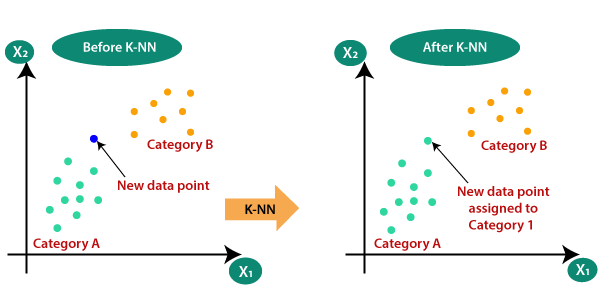

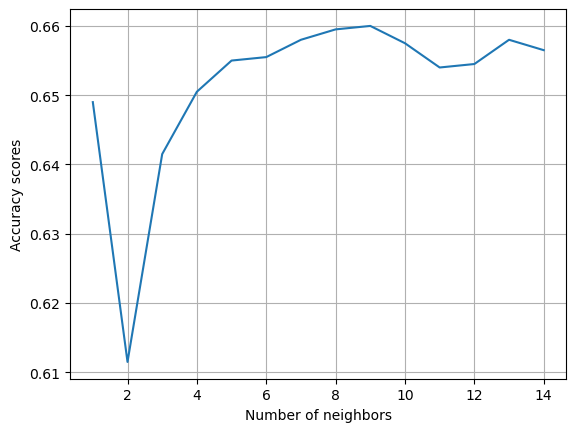

In [123]:
from sklearn.neighbors import KNeighborsClassifier as knnClassifier
from sklearn.metrics import accuracy_score

#find optimum number of neighbors
k_range = range(1, 15)
k_scores = []

for k in k_range:
    knn = knnClassifier(n_neighbors=k)
    o_vs_r = OneVsRestClassifier(knn)
    o_vs_r.fit(X_train , y_train)
    scores = accuracy_score(y_test, o_vs_r.predict(X_test))
    k_scores.append(scores)

# Plot the results
plt.plot(k_range, k_scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy scores')
plt.grid()
plt.show()


k-value 9 is showing highest accuracy.

In [124]:

knn = knnClassifier(n_neighbors=9)
o_vs_r = OneVsRestClassifier(knn)
o_vs_r.fit(X_train , y_train)
knn_pred = o_vs_r.predict(X_test)
knn_scoret = o_vs_r.score(X_test , y_test)


In [125]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.70      0.60      0.65       590
           1       0.68      0.73      0.71      1037
           2       0.52      0.52      0.52       373

    accuracy                           0.66      2000
   macro avg       0.63      0.62      0.62      2000
weighted avg       0.66      0.66      0.65      2000



In [126]:
knn_pred_t = o_vs_r.predict(test_pca)

In [127]:
knn_pred_t[:25]

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 0, 2], dtype=int64)

### 3) SVM

In the context of classification, an SVM classifier works by finding the hyperplane in a high-dimensional space that maximally separates the two classes. The hyperplane is chosen so that it is as far as possible from the nearest data points of each class, known as support vectors.
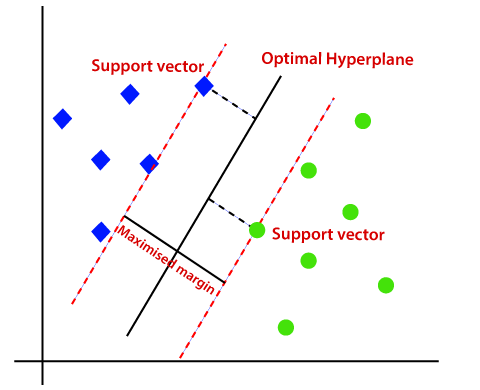

In [128]:
from sklearn.svm import SVC


svm_clf = SVC(kernel = 'linear')
o_vs_r = OneVsRestClassifier(svm_clf)
o_vs_r.fit(X_train, y_train)
svm_pred = o_vs_r.predict(X_test)
svm_scoret = o_vs_r.score(X_test , y_test)

In [129]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.65      0.58      0.62       590
           1       0.59      0.83      0.69      1037
           2       0.50      0.03      0.05       373

    accuracy                           0.61      2000
   macro avg       0.58      0.48      0.45      2000
weighted avg       0.59      0.61      0.55      2000



In [130]:
svm_pred_t = o_vs_r.predict(test_pca)

In [131]:
svm_pred_t[0:25]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1], dtype=int64)

### 4) Decision Tree

The intuition behind Decision Trees is that you use the dataset features to create yes/no questions and continually split the dataset until you isolate all data points belonging to each class.

With this process you’re organizing the data in a tree structure.Every time you ask a question you’re adding a node to the tree. And the first node is called the root node.The result of asking a question splits the dataset based on the value of a feature, and creates new nodes.
If you decide to stop the process after a split, the last nodes created are called leaf nodes.

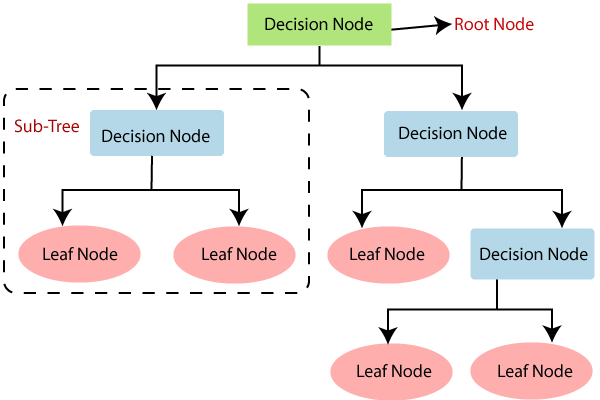

In [132]:

from sklearn.tree import DecisionTreeClassifier


In [133]:
# modeling 

dt = DecisionTreeClassifier(random_state=42,max_depth=10,min_samples_split=2)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

dt_scoret = dt.score(X_test, y_test)


In [134]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65       590
           1       0.69      0.70      0.69      1037
           2       0.54      0.47      0.50       373

    accuracy                           0.65      2000
   macro avg       0.62      0.61      0.62      2000
weighted avg       0.64      0.65      0.65      2000



In [135]:
dt_pred_t = dt.predict(test_pca)

In [136]:
dt_pred_t[0:25]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 2], dtype=int64)

### 5) Random Forest

It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model. Random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

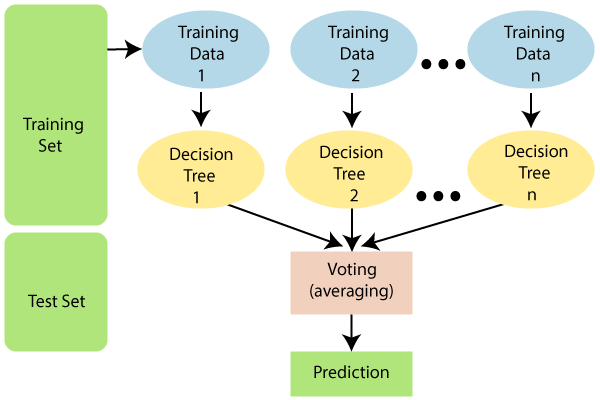

In [137]:
from sklearn.ensemble import RandomForestClassifier as rfClassifier

rf = rfClassifier(max_features= 14, max_depth= 8)
rf.fit(X_train , y_train)
rf_pred = rf.predict(X_test)
rf_scoret = rf.score(X_test , y_test)

In [138]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       590
           1       0.70      0.80      0.75      1037
           2       0.64      0.52      0.57       373

    accuracy                           0.70      2000
   macro avg       0.70      0.66      0.67      2000
weighted avg       0.70      0.70      0.70      2000



In [139]:
rf_pred_t = rf.predict(test_pca)

In [140]:
rf_pred_t[:25]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1], dtype=int64)

### 6) Extreme Gradient Boosting (XGBoost)
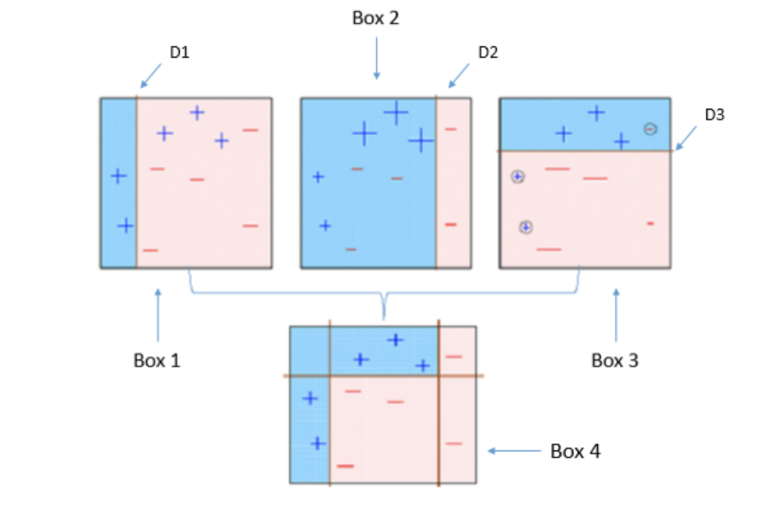

In XGBoost, a tree ensemble model is constructed by training many decision trees on subsets of the data, using a process called boosting. The decision trees are trained in a sequential manner, with each tree being trained to correct the mistakes of the previous tree.

In [141]:
import xgboost as xgb

In [142]:
# modeling 
xgboost = xgb.XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=100, num_class=3)
xgboost.fit(X_train, y_train)

xgb_pred = xgboost.predict(X_test)
xgb_scoret = xgboost.score(X_test, y_test)

In [143]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       590
           1       0.70      0.79      0.74      1037
           2       0.64      0.54      0.58       373

    accuracy                           0.70      2000
   macro avg       0.69      0.66      0.67      2000
weighted avg       0.70      0.70      0.70      2000



In [144]:
xgb_pred_t = xgboost.predict(test_pca)

In [145]:
xgb_pred_t[:25]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1], dtype=int64)

### 7) Light gbm 

Light GBM is a fast, distributed, high-performance gradient boosting framework that uses a tree-based learning algorithm.
Light GBM splits the tree leaf-wise with the best fit whereas other boosting algorithms split the tree depth-wise or level-wise rather than leaf-wise. In other words, Light GBM grows trees vertically while other algorithms grow trees horizontally.


In [146]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [147]:
lgb_model = LGBMClassifier(num_class=3)
lgb_model.fit(X_train, y_train)
 
# Predicting the Target variable
lgb_pred = lgb_model.predict(X_test)
lgb_scoret = lgb_model.score(X_test, y_test)

In [148]:
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       590
           1       0.73      0.81      0.76      1037
           2       0.72      0.60      0.65       373

    accuracy                           0.73      2000
   macro avg       0.73      0.69      0.71      2000
weighted avg       0.73      0.73      0.73      2000



In [149]:
lgb_pred_t =lgb_model.predict(test_pca)

In [150]:
lgb_pred_t[:25]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1], dtype=int64)

### 8) CatBoost
CatBoost is an implementation of the gradient boosting algorithm for decision tree-based models. It works by building a series of decision trees, with each tree being trained to correct the mistakes of the previous tree. This process is repeated until the desired level of model performance is achieved.

CatBoost also includes a number of advanced features that make it well-suited to handling categorical data. For example, it can automatically handle missing values and handle categorical features by encoding them as numerical values. It can also select the best combinations of categorical features to use in the model.

In [151]:
from catboost import CatBoostClassifier

In [152]:
# modeling 
catboost = CatBoostClassifier(random_state=42,classes_count=3, verbose=False)
catboost.fit(X_train, y_train)
cat_pred = catboost.predict(X_test)
cat_scoret = catboost.score(X_test, y_test)

In [153]:
print(classification_report(y_test, cat_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       590
           1       0.73      0.81      0.77      1037
           2       0.72      0.61      0.66       373

    accuracy                           0.74      2000
   macro avg       0.74      0.71      0.72      2000
weighted avg       0.74      0.74      0.74      2000



In [154]:
cat_pred_t = catboost.predict(test_pca)

In [155]:
cat_pred_t[:25].reshape(1,-1)


array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1]], dtype=int64)

In [156]:
# evaluate the models
models = [ 'Logistic Regression','KNN','SVM-linear','Decision Tree','Random Forest', 'XGBoost','Light gbm','CatBoost']
data = [ lgr_scoret*100,knn_scoret*100, svm_scoret*100,dt_scoret*100,rf_scoret*100, xgb_scoret*100,lgb_scoret*100, cat_scoret*100]
cols = ['Accuracy Score']
pd.DataFrame(data=data , index= models , columns= cols).sort_values(by=['Accuracy Score'], ascending= False)



,Accuracy Score
CatBoost,74.05
Light gbm,72.85
Random Forest,70.50
XGBoost,69.90
KNN,65.50
Decision Tree,64.70
Logistic Regression,63.95
SVM-linear,60.95


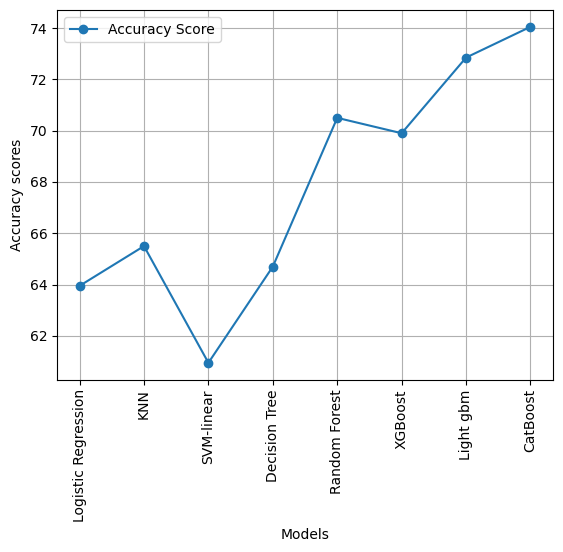

In [157]:
#plot the accuracies
plt.plot(models,data,'o-')
plt.xlabel("Models")
plt.ylabel('Accuracy scores')
plt.legend(cols)
plt.xticks(rotation=90)
plt.grid()
plt.show()

Catboost is showing best accuracy (74.05%).

### Stratified KFold

In K-Fold cross-validation, the data is divided into K folds, and the model is trained and evaluated K times, using a different fold as the test set in each iteration. Stratified K-Fold cross-validation is similar, except that it ensures that the proportion of the target class is the same in each fold as it is in the original dataset.



In [158]:
### Stratified KFold
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Create a list of models to evaluate
model_names = [ 'Logistic Regression','KNN','SVM-linear','Decision Tree','Random Forest', 'XGBoost','Light gbm','CatBoost']
models = [lgr, knn, svm_clf, dt, rf, xgboost,lgb_model,catboost]
mean_scores = []

# Split the data into K folds, ensuring that the distribution of classes is the same in each fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use a for loop to iterate through the models
for model in models:
    # Calculate the cross-validated accuracy using the `cross_val_score` function
    scores = cross_val_score(model, X_pca, y, cv=kfold, scoring='accuracy')
    mean_scores.append(scores.mean())

    # Print the mean and standard deviation of the scores for the current model
    print(f'{model.__class__.__name__}: {scores.mean():.2f} ')


LogisticRegression: 0.63 
KNeighborsClassifier: 0.65 
SVC: 0.63 
DecisionTreeClassifier: 0.66 
RandomForestClassifier: 0.70 
XGBClassifier: 0.70 
LGBMClassifier: 0.73 
CatBoostClassifier: 0.73 


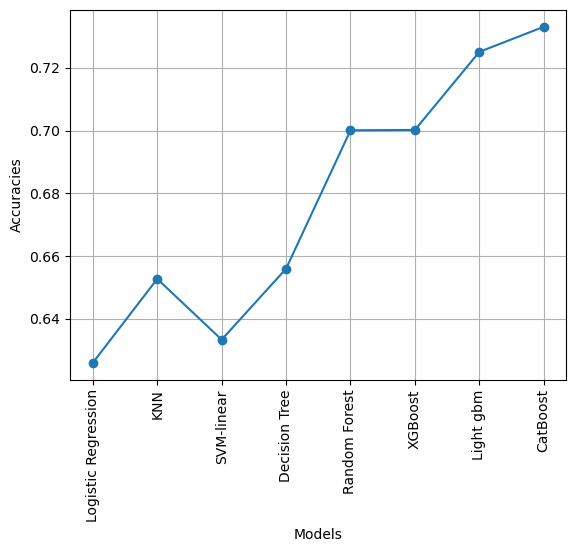

In [159]:
#plot the accuracies
plt.plot(model_names,mean_scores,'o-')
plt.xlabel('Models')
plt.ylabel("Accuracies")
plt.xticks(rotation=90)
plt.grid()
plt.show()

Catboost is showing best accuracy(73%).

## Fine-tuning
Fine tuning is the process of adjusting the hyperparameters of a machine learning model in order to improve its performance on a particular task.

### Grid Search
Grid search is a method for tuning the hyperparameters of a machine learning model. It involves training and evaluating a model for every possible combination of hyperparameter values, and returning the combination that performs the best.

In [160]:
#### Fine-tuning CatBoost,Light gbm,Random Forest,XGBoost models

### Random Forest

In [161]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [2, 4, 6, 8],
              'min_samples_leaf': [1, 2, 4]}

# Create the random forest classifier
rf = rfClassifier()

# Set up the grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
# Print the best hyperparameters
best_model = grid_search.best_estimator_
rf_scoret = best_model.score(X_test , y_test)
print(f"Best model:{best_model},accuracy is :{rf_scoret*100:.2f}%")

Best model:RandomForestClassifier(max_depth=8),accuracy is :67.65%


### XGBoost

In [162]:
# Define the hyperparameters
param_grid = {'learning_rate': [0.1, 0.5, 1],
              'max_depth': [2, 4, 6, 8]}

# Create the XGBoost classifier
xgboost = xgb.XGBClassifier(num_class=3)

# Set up the grid search
grid_search = GridSearchCV(xgboost, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_model = grid_search.best_estimator_
xgb_scoret = best_model.score(X_test , y_test)
print(f"Best model:{best_model},accuracy is :{xgb_scoret*100:.2f}%")

Best model:XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=3, num_parallel_tree=1, objective='multi:softprob', ...),accuracy is :73.55%


### LightGBM

In [163]:
#Define the hyperparameters
param_grid = {'learning_rate': [0.01, 0.1, 1],
              'n_estimators': [50, 100, 200],
              'num_leaves': [5, 10, 20]}

# Create the LightGBM classifier
lgb_model = LGBMClassifier(num_class=3)

# Set up the grid search
grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
# Print the best hyperparameters
best_model = grid_search.best_estimator_
lgb_scoret = best_model.score(X_test , y_test)
print(f"Best model:{best_model},accuracy is :{lgb_scoret*100:.2f}%")

Best model:LGBMClassifier(n_estimators=200, num_class=3, num_leaves=20),accuracy is :73.40%


### CatBoost

In [164]:
# Define the hyperparameters
param_grid = {'depth': [3, 6, 9],'n_estimators':[100, 200, 300]}

# Create the CatBoost classifier
catboost = CatBoostClassifier(verbose=False)

# Set up the grid search
grid_search = GridSearchCV(catboost, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_model = grid_search.best_estimator_
cat_scoret = best_model.score(X_test , y_test)
print(f"Best model:{best_model},accuracy is :{cat_scoret*100:.2f}%")
print(f"Best hyperparameters: {grid_search.best_params_}")

Best model:<catboost.core.CatBoostClassifier object at 0x000002B2FB00D6D0>,accuracy is :72.75%
Best hyperparameters: {'depth': 9, 'n_estimators': 300}


In [165]:
# evaluate the models
models = [ 'Random Forest', 'XGBoost','Light gbm','CatBoost']
data = [ rf_scoret*100, xgb_scoret*100,lgb_scoret*100, cat_scoret*100]
cols = ['Accuracy Score']
pd.DataFrame(data=data , index= models , columns= cols).sort_values(by=['Accuracy Score'], ascending= False)

,Accuracy Score
XGBoost,73.55
Light gbm,73.40
CatBoost,72.75
Random Forest,67.65
